In [1]:
import os 
import numpy as np
import cv2
from matplotlib import pyplot as plt
import skimage

# Importing original data to kaggle's working directory

In [2]:
import shutil
import os

# Path to your 'original' folder (read-only)
original_folder = '/kaggle/input/watershed/Final data/Final data/New folder/Original'

# Path to a writable directory
working_folder = '/kaggle/working/original_renamed/'

# Create the writable directory if it doesn't exist
if not os.path.exists(working_folder):
    os.makedirs(working_folder)

# List all the image files in the 'original' folder
image_files = sorted(os.listdir(original_folder))

# Loop through the files and copy to the writable directory, keeping original names
for filename in image_files:
    # Full path to the current file
    current_path = os.path.join(original_folder, filename)
    
    # Full path to the new file in the writable directory
    new_path = os.path.join(working_folder, filename)
    
    # Copy the file to the writable folder
    shutil.copy(current_path, new_path)

print("Copying complete.")



Copying complete.


# Importing Mask data to kaggle's working directory

In [3]:
import shutil
import os

# Path to your 'original' folder (read-only)
original_folder = '/kaggle/input/watershed/Final data/Final data/New folder/Mask'

# Path to a writable directory
working_folder = '/kaggle/working/mask_renamed/'

# Create the writable directory if it doesn't exist
if not os.path.exists(working_folder):
    os.makedirs(working_folder)

# List all the image files in the 'original' folder
image_files = sorted(os.listdir(original_folder))

# Loop through the files and copy to the writable directory, keeping original names
for filename in image_files:
    # Full path to the current file
    current_path = os.path.join(original_folder, filename)
    
    # Full path to the new file in the writable directory
    new_path = os.path.join(working_folder, filename)
    
    # Copy the file to the writable folder
    shutil.copy(current_path, new_path)

print("Copying complete.")



Copying complete.


# setting directory variables

In [4]:
image_dir = '/kaggle/working/original_renamed'

# Iterating over all the images in the dataset

In [5]:
for image_file in image_files:
    img_path = os.path.join(image_dir, image_file)

# Reading the image

In [6]:
# # Check image names in both directories
# original_files = os.listdir(original_img_dir)
# mask_files = os.listdir(mask_img_dir)

# print("Original image files:", original_files)
# print("Mask files:", mask_files)


In [7]:
# pip install keras --upgrade

# Applying FCN

In [8]:
import os
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Directories for the dataset
original_img_dir = "/kaggle/working/original_renamed"
mask_img_dir = "/kaggle/working/mask_renamed"
output_dir = "/kaggle/working/FCN_output"

# Create the output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Image dimensions (adjust these according to your dataset)
IMG_HEIGHT, IMG_WIDTH = 224, 224

def load_images(image_dir, mask_dir, img_height, img_width):
    images = []
    masks = []
    missing_masks = []
    
    image_files = sorted(os.listdir(image_dir))
    mask_files = sorted(os.listdir(mask_dir))

    for img_name in image_files:
        img_path = os.path.join(image_dir, img_name)
        mask_name = img_name  # Assuming the mask has the same name
        mask_path = os.path.join(mask_dir, mask_name)
        
        # Check if the corresponding mask exists
        if not os.path.exists(mask_path):
            missing_masks.append(img_name)
            continue  # Skip this image if mask is missing

        # Load and preprocess the original image
        img = load_img(img_path, target_size=(img_height, img_width))
        img = img_to_array(img) / 255.0  # Normalize the image
        images.append(img)
        
        # Load and preprocess the mask
        mask = load_img(mask_path, target_size=(img_height, img_width), color_mode="grayscale")
        mask = img_to_array(mask) / 255.0  # Normalize the mask
        mask = np.round(mask)  # Ensure the mask is binary
        masks.append(mask)
    
    print(f"Missing masks for images: {missing_masks}")  # Log missing masks
    
    return np.array(images), np.array(masks)
# Load the dataset
X, Y = load_images(original_img_dir, mask_img_dir, IMG_HEIGHT, IMG_WIDTH)

# Split the dataset into training and validation sets
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42)


Missing masks for images: ['010961af-b38c-49de-aca0-e3732d73d414.jpg', '0346611b-ea43-45bd-9f16-c6e8086273d2.jpg', '03be08c8-2cf3-4de6-8ac6-5f7817a6a643.jpg', '06bbcd42-3ba8-4476-8804-8455f56dd928.jpg', '0864c569-2ad7-48ed-b12a-e40aa5b93756.jpg', '087602a2-288b-4a4d-b01a-524f0d799d89.jpg', '0897f682-5301-49fc-a8d5-9df7762040bb.jpg', '0a3b53c7-e7ab-4135-80aa-fd2079d727d6.jpg', '0e0bc36f-6fb2-4763-b0a1-b4c67b2d2d2a.jpg', '15625643-d964-4b14-9839-c126384ae35b.jpg', '15a5849d-8bc7-4e01-938b-c1f55067787d.jpg', '1b814efc-7bf9-40ae-8e13-49dc2c04732f.jpg', '1e647046-333b-4102-a0c6-4c29405c37b3.jpg', '21116b9d-e6be-483f-8394-e74622b2e182.jpg', '224c80b8-6c55-48cf-b719-96a47d223dc3.jpg', '23e581e7-0fb7-42ff-ba55-a86beefc0619.jpg', '25865b39-56fb-409a-8800-3d368dd264ed.jpg', '291fe50c-2134-4708-bfa4-09b36ffea123.jpg', '294bc238-efdb-4f88-b83b-f41fe5750106.jpg', '2c03b3c9-7786-4e1b-ac2b-c98e9f8358f2.jpg', '3147f1e4-6fc4-4eff-a9dd-ddeee5e2de13.jpg', '31c62771-4e90-4038-9abc-d196beda9898.jpg', '3495

In [9]:


# Build the FCN model (same as before)
def build_fcn(input_shape=(224, 224, 3), num_classes=1):
    inputs = tf.keras.layers.Input(shape=input_shape)

    # Encoder: Downsampling
    x = tf.keras.layers.Conv2D(16, (3, 3), padding="same", activation="relu")(inputs)
    x = tf.keras.layers.Conv2D(32, (3, 3), padding="same", activation="relu")(x)
    x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
    
    x = tf.keras.layers.Conv2D(64, (3, 3), padding="same", activation="relu")(x)
    x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
    
    x = tf.keras.layers.Conv2D(128, (3, 3), padding="same", activation="relu")(x)
    x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
    
    # Bottleneck
    x = tf.keras.layers.Conv2D(2048, (7, 7), padding="same", activation="relu")(x)
    
    # Decoder: Upsampling
    x = tf.keras.layers.Conv2DTranspose(128, (3, 3), strides=(2, 2), padding="same", activation="relu")(x)
    x = tf.keras.layers.Conv2DTranspose(64, (3, 3), strides=(2, 2), padding="same", activation="relu")(x)
    x = tf.keras.layers.Conv2DTranspose(32, (3, 3), strides=(2, 2), padding="same", activation="relu")(x)

    # Output layer
    outputs = tf.keras.layers.Conv2D(num_classes, (1, 1), activation="sigmoid")(x)  # Binary segmentation
    
    model = tf.keras.models.Model(inputs, outputs)
    return model

# Compile the model
fcn_model = build_fcn(input_shape=(IMG_HEIGHT, IMG_WIDTH, 3), num_classes=1)
fcn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Save the best model during training
checkpoint = ModelCheckpoint("/kaggle/working/fcn_best_model.keras", monitor='val_loss', verbose=1, save_best_only=True)

# Train the model
history = fcn_model.fit(
    X_train, Y_train, 
    validation_data=(X_val, Y_val), 
    epochs=50, 
    batch_size=16, 
    callbacks=[checkpoint]
)



# Load the best saved model
fcn_model.load_weights("/kaggle/working/fcn_best_model.keras")

# Function to save the segmented outputs
def save_segmented_images(model, image_dir, output_dir, img_height, img_width):
    for img_name in os.listdir(image_dir):
        # Load and preprocess the image
        img_path = os.path.join(image_dir, img_name)
        img = load_img(img_path, target_size=(img_height, img_width))
        img = img_to_array(img) / 255.0
        img = np.expand_dims(img, axis=0)

        # Predict the segmentation mask
        pred_mask = model.predict(img)[0]
        pred_mask = (pred_mask > 0.5).astype(np.uint8)  # Binarize the output mask

        # Save the segmented mask
        output_path = os.path.join(output_dir, img_name)
        cv2.imwrite(output_path, pred_mask * 255)  # Save as grayscale image

# Save the segmented images
save_segmented_images(fcn_model, original_img_dir, output_dir, IMG_HEIGHT, IMG_WIDTH)


Epoch 1/50


I0000 00:00:1728057694.209524      65 service.cc:145] XLA service 0x788758012cb0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1728057694.209615      65 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


 1/61 ━━━━━━━━━━━━━━━━━━━━ 14:14 14s/step - accuracy: 0.4321 - loss: 0.6933

I0000 00:00:1728057705.700104      65 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step - accuracy: 0.6796 - loss: 0.6049

I0000 00:00:1728057720.553453      65 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'input_reduce_select_fusion_2', 36 bytes spill stores, 36 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'input_compare_reduce_fusion_3', 52 bytes spill stores, 52 bytes spill loads




Epoch 1: val_loss improved from inf to 0.38087, saving model to /kaggle/working/fcn_best_model.keras
61/61 ━━━━━━━━━━━━━━━━━━━━ 33s 305ms/step - accuracy: 0.6799 - loss: 0.6036 - val_accuracy: 0.7197 - val_loss: 0.3809
Epoch 2/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step - accuracy: 0.8414 - loss: 0.3053
Epoch 2: val_loss improved from 0.38087 to 0.17783, saving model to /kaggle/working/fcn_best_model.keras
61/61 ━━━━━━━━━━━━━━━━━━━━ 11s 174ms/step - accuracy: 0.8421 - loss: 0.3045 - val_accuracy: 0.9255 - val_loss: 0.1778
Epoch 3/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step - accuracy: 0.9304 - loss: 0.1668
Epoch 3: val_loss improved from 0.17783 to 0.14388, saving model to /kaggle/working/fcn_best_model.keras
61/61 ━━━━━━━━━━━━━━━━━━━━ 11s 174ms/step - accuracy: 0.9304 - loss: 0.1666 - val_accuracy: 0.9404 - val_loss: 0.1439
Epoch 4/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step - accuracy: 0.9468 - loss: 0.1283
Epoch 4: val_loss improved from 0.14388 to 0.11524, saving model to /kaggle/

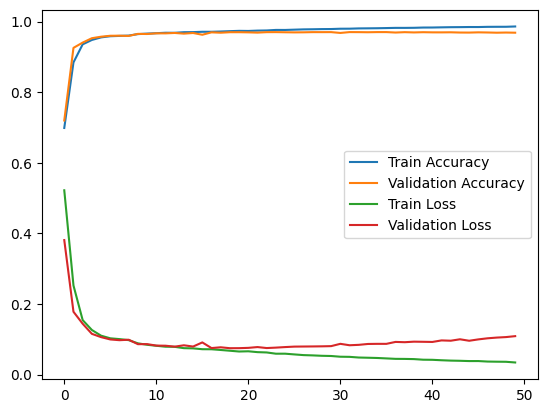

In [10]:
# Plot the training and validation accuracy and loss
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [11]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras import backend as K

# Define directories
original_masks_dir = '/kaggle/working/mask_renamed'
segmented_masks_dir = '/kaggle/working/FCN_output'

def dice_coef(y_true, y_pred, smooth=1):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    dice = (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)
    return dice

def jaccard_index(y_true, y_pred, smooth=1):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    union = K.sum(y_true_f + y_pred_f) - intersection
    iou = (intersection + smooth) / (union + smooth)
    return iou

# List files in both directories
original_mask_files = [f for f in os.listdir(original_masks_dir) if f.endswith('.png')]
segmented_mask_files = [f for f in os.listdir(segmented_masks_dir) if f.endswith('.png')]

# Initialize metrics lists
dice_scores = []
jaccard_scores = []

# Iterate through the mask files
for mask_file in original_mask_files:
    if mask_file in segmented_mask_files:
        # Load original and segmented images
        original_mask_path = os.path.join(original_masks_dir, mask_file)
        segmented_mask_path = os.path.join(segmented_masks_dir, mask_file)
        
        original_mask = cv2.imread(original_mask_path, cv2.IMREAD_GRAYSCALE)
        segmented_mask = cv2.imread(segmented_mask_path, cv2.IMREAD_GRAYSCALE)

        # Resize original mask to match segmented mask size
        original_mask_resized = cv2.resize(original_mask, (segmented_mask.shape[1], segmented_mask.shape[0]))

        # Binarize the masks
        original_mask_resized = (original_mask_resized > 0).astype(np.float32)
        segmented_mask = (segmented_mask > 0).astype(np.float32)

        # Convert to tensors
        y_true = tf.convert_to_tensor(original_mask_resized)
        y_pred = tf.convert_to_tensor(segmented_mask)

        # Calculate metrics
        dice_score = dice_coef(y_true, y_pred).numpy()
        jaccard_score = jaccard_index(y_true, y_pred).numpy()
        
        dice_scores.append(dice_score)
        jaccard_scores.append(jaccard_score)
        
        print(f"File: {mask_file}, Dice Coef: {dice_score:.4f}, Jaccard Index: {jaccard_score:.4f}")

# Calculate average scores
if dice_scores:  
    average_dice = np.mean(dice_scores)
    average_jaccard = np.mean(jaccard_scores)
    print(f"Average Dice Coefficient: {average_dice:.4f}")
    print(f"Average Jaccard Index: {average_jaccard:.4f}")
else:
    print("No valid mask pairs found for evaluation.")


File: 59daa25e-85d6-42f2-8f39-cc9f9d5d252e.png, Dice Coef: 0.9353, Jaccard Index: 0.8785
File: aa2dfa24-2dc3-4279-a232-f84780ace190.png, Dice Coef: 0.9467, Jaccard Index: 0.8989
File: 0d095f3a-9243-472b-90b4-0ce8309e778c.png, Dice Coef: 0.9351, Jaccard Index: 0.8782
File: 9e0e1928-d19a-4100-b093-0b962ac09e05.png, Dice Coef: 0.9405, Jaccard Index: 0.8878
File: d4fef0c5-6597-48b6-97e9-32ed504488e6.png, Dice Coef: 0.9752, Jaccard Index: 0.9515
File: ecd68ba2-48af-4866-826a-7cd1c147c055.png, Dice Coef: 0.9610, Jaccard Index: 0.9248
File: 4184a235-d209-4151-86e9-6c77e7938dab.png, Dice Coef: 0.9587, Jaccard Index: 0.9207
File: 9ca20b10-e2fd-4bd2-93ef-78298f763ed5.png, Dice Coef: 0.9473, Jaccard Index: 0.8999
File: c84edeb4-311c-4e82-88f9-ae0505b3ad13.png, Dice Coef: 0.9406, Jaccard Index: 0.8879


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


File: c890ee00-daa5-4b20-9cd5-930748ecc4e0.png, Dice Coef: 0.9642, Jaccard Index: 0.9308
File: 22516db4-8687-4051-90c4-2bb1ca3204a5.png, Dice Coef: 0.9547, Jaccard Index: 0.9132
File: 7029feb3-9ffe-46e4-9883-6a9df84f7b62.png, Dice Coef: 0.9410, Jaccard Index: 0.8886
File: 8e4bdd0d-1c72-4836-ae3e-05e2e50e4983.png, Dice Coef: 0.9612, Jaccard Index: 0.9254
File: 5397d8e2-bb09-42e7-9861-65ffad0fe94e.png, Dice Coef: 0.9618, Jaccard Index: 0.9264
File: de00f9a5-aa8b-4679-8ec6-85528a942d6f.png, Dice Coef: 0.9779, Jaccard Index: 0.9567
File: 30948737-0d0d-4b68-b9ab-50577e0fe026.png, Dice Coef: 0.9594, Jaccard Index: 0.9219
File: bb2042c5-35e1-43cc-8171-7de81b764361.png, Dice Coef: 0.9553, Jaccard Index: 0.9144
File: da49db57-0c2f-4213-b322-c88c19fb9296.png, Dice Coef: 0.9548, Jaccard Index: 0.9135


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


File: da111ca5-520f-4ea8-97ad-ae5fce58ee91.png, Dice Coef: 0.9624, Jaccard Index: 0.9276
File: 2c4d72f1-71a6-4bf1-b5d9-8023c7bbec74.png, Dice Coef: 0.9668, Jaccard Index: 0.9358
File: 9af4b8ae-c912-41fd-b4c0-34864c75360f.png, Dice Coef: 0.9661, Jaccard Index: 0.9345
File: 91827f1a-9b04-4ef0-972c-12e90e60c516.png, Dice Coef: 0.9669, Jaccard Index: 0.9359
File: 02ea7aa8-c142-4a3d-939f-e77689741341.png, Dice Coef: 0.9627, Jaccard Index: 0.9281
File: 6347dd6a-cfdf-4cb5-bc50-cff5403cfecb.png, Dice Coef: 0.9639, Jaccard Index: 0.9303
File: 4823c1fe-a7f9-4b92-959f-0d9be09cd14b.png, Dice Coef: 0.9649, Jaccard Index: 0.9322
File: 5cac6ddf-c8c6-45de-bce0-a1db64b14fb5.png, Dice Coef: 0.9681, Jaccard Index: 0.9381
File: 58f7e1da-3478-48f4-958c-e9b1cb8696aa.png, Dice Coef: 0.9656, Jaccard Index: 0.9335


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


File: c35ee701-fde2-46b5-b178-1fe3f1ea7da2.png, Dice Coef: 0.9679, Jaccard Index: 0.9377
File: 261562a8-ffd8-4e0e-919b-22e267000b74.png, Dice Coef: 0.9434, Jaccard Index: 0.8929
File: b4bde4e8-f48b-4ae2-be01-86d8c91d0af9.png, Dice Coef: 0.9488, Jaccard Index: 0.9026
File: bfc61c48-685d-470b-86b1-e4c7eb85c4fd.png, Dice Coef: 0.9661, Jaccard Index: 0.9344
File: 666601e7-608d-4d19-999f-8fc6ab373a55.png, Dice Coef: 0.9522, Jaccard Index: 0.9088
File: b59dc3a0-3d54-4e3b-a485-33b3e43966de.png, Dice Coef: 0.9687, Jaccard Index: 0.9393
File: f2574be3-81c6-4fc3-8a40-0230d1264f52.png, Dice Coef: 0.9494, Jaccard Index: 0.9037
File: 9bd40bc6-4949-42d3-b38f-d60422932f65.png, Dice Coef: 0.9622, Jaccard Index: 0.9271
File: 214f1d15-a081-476e-992d-6c3a77f03d59.png, Dice Coef: 0.9559, Jaccard Index: 0.9155
File: 0a747cb3-c720-4572-a661-ab5670a5c42e.png, Dice Coef: 0.9506, Jaccard Index: 0.9059


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


File: 25cfca07-2101-484f-b312-a927395f2651.png, Dice Coef: 0.9729, Jaccard Index: 0.9472
File: 3b4440f7-a69b-4042-a9d0-d6958abcdf4e.png, Dice Coef: 0.9369, Jaccard Index: 0.8813
File: 419309ef-da3f-4424-93cf-01ff4c52b017.png, Dice Coef: 0.9455, Jaccard Index: 0.8967
File: 1f8edb2a-40bc-4beb-aa6b-884d2473df0f.png, Dice Coef: 0.9647, Jaccard Index: 0.9317
File: f97c7c87-5e27-45ea-9f93-3285d74091de.png, Dice Coef: 0.9557, Jaccard Index: 0.9151
File: c3215597-a032-46be-9058-d6de1e5191d7.png, Dice Coef: 0.9663, Jaccard Index: 0.9348
File: bf20d04d-ff8a-4910-91d7-94054c267d1b.png, Dice Coef: 0.9737, Jaccard Index: 0.9488
File: b7d0ae11-a393-4aec-8f68-6ba07147f78a.png, Dice Coef: 0.9684, Jaccard Index: 0.9387
File: 68f34a9c-f73d-4238-8f55-4b05a8a2154c.png, Dice Coef: 0.9530, Jaccard Index: 0.9102


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


File: b91b1641-ee06-44d8-94cc-24cdb583cc37.png, Dice Coef: 0.9689, Jaccard Index: 0.9397
File: a4fbb9f2-9b75-4fdc-877d-2feaafac25b3.png, Dice Coef: 0.9487, Jaccard Index: 0.9024
File: 6fb707b1-5c07-479f-8385-5404bf5747b0.png, Dice Coef: 0.9762, Jaccard Index: 0.9534
File: c10b125d-10c2-474a-9c6a-5249935c638e.png, Dice Coef: 0.9646, Jaccard Index: 0.9317
File: 93f7e207-0d8e-47f8-8258-09a0e03dbdd6.png, Dice Coef: 0.9612, Jaccard Index: 0.9252
File: 6f67a66b-56ec-4c36-ae7c-f250d3b86a23.png, Dice Coef: 0.9536, Jaccard Index: 0.9113
File: c52f8cc8-afd7-441c-9f1f-18b6e16d79cf.png, Dice Coef: 0.9726, Jaccard Index: 0.9466
File: 6dfafdf1-f588-4e80-8cf8-0126e1bf7af9.png, Dice Coef: 0.9638, Jaccard Index: 0.9302
File: f232eec3-02c0-43f9-bf32-3e60245397e2.png, Dice Coef: 0.9621, Jaccard Index: 0.9271
File: 7e25ced3-5caf-47f8-ad0c-42946bd4468b.png, Dice Coef: 0.9673, Jaccard Index: 0.9368
File: 071901eb-4c3f-404b-a747-3d0b9d0a5158.png, Dice Coef: 0.9329, Jaccard Index: 0.8743
File: cc275c45-7511-4

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


File: 81af1442-d835-46bf-b80b-a898dba3da1b.png, Dice Coef: 0.9626, Jaccard Index: 0.9279
File: 31435107-c77d-42f8-a619-75cba6a5161b.png, Dice Coef: 0.9432, Jaccard Index: 0.8924
File: d31dd2c0-ae8e-4499-86bb-7cabb6e438b9.png, Dice Coef: 0.9578, Jaccard Index: 0.9190
File: c94827ce-d619-4705-a68a-df63a2c95ffa.png, Dice Coef: 0.9399, Jaccard Index: 0.8867
File: fbcb2ef0-3c97-4d7a-8b96-0147c73f3941.png, Dice Coef: 0.9578, Jaccard Index: 0.9190
File: 4903d9c7-de88-426a-b42d-a7e797e5ebcd.png, Dice Coef: 0.9449, Jaccard Index: 0.8956
File: b318889c-3c60-477c-b8f6-d18cb01a59df.png, Dice Coef: 0.9351, Jaccard Index: 0.8781
File: 4b346035-b8c0-46ca-8fdb-a01b1421ee4a.png, Dice Coef: 0.9674, Jaccard Index: 0.9368
File: 11b72c7b-5c52-44b7-adb7-21eacc25e441.png, Dice Coef: 0.9515, Jaccard Index: 0.9075


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


File: 9ebd623d-5534-4dd9-bff8-cdedf322db35.png, Dice Coef: 0.9441, Jaccard Index: 0.8941
File: 79d7a014-21ff-40f1-9ac4-a69839390654.png, Dice Coef: 0.9667, Jaccard Index: 0.9355
File: c680004e-6ee2-43d7-877c-edc9b5ebeecc.png, Dice Coef: 0.9604, Jaccard Index: 0.9239
File: c4c7ed75-dbdf-4bb6-b6ba-718903cf7264.png, Dice Coef: 0.9470, Jaccard Index: 0.8994
File: b666fcc2-d0b2-441e-bc5a-c660345eeb5d.png, Dice Coef: 0.9658, Jaccard Index: 0.9339
File: 38d1b930-dd97-4248-9160-e9389a1a8dd7.png, Dice Coef: 0.9653, Jaccard Index: 0.9329
File: 26799d2b-a289-4eff-9218-0aad77e05e41.png, Dice Coef: 0.9692, Jaccard Index: 0.9402
File: ebb53337-1d4f-4ab5-9b6d-83a66f48fe2e.png, Dice Coef: 0.8856, Jaccard Index: 0.7947
File: a9daf82a-a46d-4296-bd72-2c374ed0a193.png, Dice Coef: 0.9409, Jaccard Index: 0.8884


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


File: a2a20600-f851-4db7-90f9-6f7be027c8b5.png, Dice Coef: 0.9471, Jaccard Index: 0.8995
File: 6c20abb2-c4bb-4de0-8774-03f4d30ce93d.png, Dice Coef: 0.9612, Jaccard Index: 0.9253
File: 3a8f468f-f9de-46a8-a7c8-f2be239fa207.png, Dice Coef: 0.9503, Jaccard Index: 0.9053
File: de2b8835-552c-4f01-98b7-67bc4910062e.png, Dice Coef: 0.9472, Jaccard Index: 0.8997
File: dfc026a9-079f-4f45-8666-e0ccba5bb437.png, Dice Coef: 0.9585, Jaccard Index: 0.9204
File: 2aeb7b85-7df9-4a63-8d37-2eecaaa190e7.png, Dice Coef: 0.9257, Jaccard Index: 0.8618
File: 5f2b32bd-fdca-4d6f-b13a-ee9f83626c8d.png, Dice Coef: 0.9549, Jaccard Index: 0.9137
File: 29648565-fe28-4517-ba72-68df0c82c9c5.png, Dice Coef: 0.9477, Jaccard Index: 0.9007
File: 7dfbfeaf-e3b1-4159-8dcd-d7f731280ac8.png, Dice Coef: 0.9489, Jaccard Index: 0.9027


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


File: 4e2873dd-651e-4ecc-ac70-7335cf21a469.png, Dice Coef: 0.9615, Jaccard Index: 0.9258
File: 7094c11a-1e62-4f98-894e-d17d138a88e9.png, Dice Coef: 0.9519, Jaccard Index: 0.9081
File: 63d36d2c-43a9-49ac-9504-028b4968c860.png, Dice Coef: 0.9641, Jaccard Index: 0.9306
File: b9de8b1a-f96a-4eb5-bc05-84ad43a054f3.png, Dice Coef: 0.9497, Jaccard Index: 0.9042
File: 7beee655-6156-43b8-b185-dbae0eaf7f45.png, Dice Coef: 0.9548, Jaccard Index: 0.9136
File: c4494d4f-732f-431a-8a9d-62403f0b74fe.png, Dice Coef: 0.9561, Jaccard Index: 0.9158
File: cd2774a0-dab2-4d68-aae9-7568b9f3d2a6.png, Dice Coef: 0.9602, Jaccard Index: 0.9234
File: 1a27ebe9-93a1-4898-af69-f276057d4012.png, Dice Coef: 0.9502, Jaccard Index: 0.9050
File: 29dc8176-dfe1-40e0-8247-2dc3c530057e.png, Dice Coef: 0.9710, Jaccard Index: 0.9437
File: 4767bfcc-fe87-4962-8c40-6ce8d9363cdf.png, Dice Coef: 0.9795, Jaccard Index: 0.9599
File: 1574565f-f45b-4160-947e-25ce1a81aaca.png, Dice Coef: 0.9425, Jaccard Index: 0.8913
File: 08f5a524-0554-4

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


File: c8af0297-ce1f-40ea-bf44-9256dcdae4e9.png, Dice Coef: 0.9564, Jaccard Index: 0.9165
File: de0321fa-6f7d-4dd1-b96b-186701c3b1d9.png, Dice Coef: 0.9640, Jaccard Index: 0.9306
File: f6ab936d-924b-4038-aa47-71b07c26b4e2.png, Dice Coef: 0.9587, Jaccard Index: 0.9207
File: cecbf663-0751-4e7f-b298-770c88afc2c1.png, Dice Coef: 0.9533, Jaccard Index: 0.9108
File: d997337e-e4a8-4ef0-b8ba-975e6c43b62c.png, Dice Coef: 0.9691, Jaccard Index: 0.9401
File: fe00fa09-d3c8-485b-9d0f-3cce556c9edd.png, Dice Coef: 0.9576, Jaccard Index: 0.9187
File: 9258fe22-6406-4d00-b6f0-3f9492925405.png, Dice Coef: 0.9727, Jaccard Index: 0.9469
File: 87d6343b-70dd-4cdd-939f-d3ac0ca2e700.png, Dice Coef: 0.9527, Jaccard Index: 0.9097
File: 6fa2b30f-9b89-46ac-9b79-c0bc105d4271.png, Dice Coef: 0.9457, Jaccard Index: 0.8971


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


File: b78b88f0-154a-4b54-8aaf-85d37a42a0f9.png, Dice Coef: 0.9726, Jaccard Index: 0.9468
File: 877d5e7f-19b6-40e7-81bd-c92f25e72503.png, Dice Coef: 0.9651, Jaccard Index: 0.9325
File: cfab01d3-0616-4efb-9290-11f0fd8bf5a3.png, Dice Coef: 0.9672, Jaccard Index: 0.9365
File: 7fdc8be8-7579-4a5c-b369-8a07ee0a8b7d.png, Dice Coef: 0.9609, Jaccard Index: 0.9248
File: 52767904-4cdc-4821-ba68-8cd0c28f9023.png, Dice Coef: 0.9656, Jaccard Index: 0.9335
File: 19979a60-df80-4111-bf69-81a7e9c4dd0b.png, Dice Coef: 0.9474, Jaccard Index: 0.9000
File: 1519257c-e3e5-4474-908f-8665b3cf1258.png, Dice Coef: 0.9445, Jaccard Index: 0.8949
File: 95bea542-6cd0-41c5-82c5-509af8c3b505.png, Dice Coef: 0.8940, Jaccard Index: 0.8083
File: 98efca97-37d2-4459-aca6-375ecc0c4539.png, Dice Coef: 0.9622, Jaccard Index: 0.9271
File: c442e2d6-aaf9-417a-9905-4737a1115f33.png, Dice Coef: 0.9649, Jaccard Index: 0.9322
File: 37a94c0f-e5d4-46fc-b4f8-994d477995fd.png, Dice Coef: 0.9599, Jaccard Index: 0.9229
File: 19370afd-f897-4

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


File: f5419bc0-4415-41b6-b832-5326cfcc534b.png, Dice Coef: 0.9593, Jaccard Index: 0.9218
File: 06cd484f-e864-4fee-8819-688b45eed98e.png, Dice Coef: 0.9646, Jaccard Index: 0.9317
File: c415532c-4cce-4580-9fcd-623c172a1abd.png, Dice Coef: 0.9676, Jaccard Index: 0.9373
File: 9f33e0ea-065b-4703-9df9-15829b891860.png, Dice Coef: 0.9581, Jaccard Index: 0.9196
File: b78ba2c8-ecb3-45b2-9cda-2c8088fa95d1.png, Dice Coef: 0.9625, Jaccard Index: 0.9278
File: bcaefb02-682a-41b9-acc7-e6cc010f5b30.png, Dice Coef: 0.9572, Jaccard Index: 0.9180
File: f4722a74-35e7-42bd-8ef6-dfff04b9cd22.png, Dice Coef: 0.9546, Jaccard Index: 0.9132
File: 8190ec37-9a5e-419f-89ed-fbfb079370db.png, Dice Coef: 0.9562, Jaccard Index: 0.9161
File: 71925778-a26e-483e-a07c-f3aaf740122a.png, Dice Coef: 0.9432, Jaccard Index: 0.8925


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


File: dbdfad64-110c-421f-a1c7-f68fd9e82d67.png, Dice Coef: 0.9588, Jaccard Index: 0.9208
File: 44b4a765-104e-4182-8871-e933c83c91ef.png, Dice Coef: 0.9644, Jaccard Index: 0.9312
File: 2196389c-45ec-46b5-bc6c-1f4a33df7f7c.png, Dice Coef: 0.9641, Jaccard Index: 0.9307
File: eeb06e39-482b-443d-8cf6-b9b5c763df78.png, Dice Coef: 0.9614, Jaccard Index: 0.9257
File: c22f7031-9cf8-48ce-b03b-1b12d0db4951.png, Dice Coef: 0.9596, Jaccard Index: 0.9224
File: a9159b11-ba49-4885-902e-00c8d5095b98.png, Dice Coef: 0.9464, Jaccard Index: 0.8982
File: a93c35ba-1690-4358-8837-669bcd850bb7.png, Dice Coef: 0.9584, Jaccard Index: 0.9201
File: c186dcd1-af61-455f-9619-1fdd8c881b06.png, Dice Coef: 0.9656, Jaccard Index: 0.9334
File: b6364a57-72a9-43f3-8d02-9f53a992dc95.png, Dice Coef: 0.9547, Jaccard Index: 0.9134


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


File: f1872d08-f8a6-4b21-aa29-f56bbf607883.png, Dice Coef: 0.9569, Jaccard Index: 0.9173
File: b901c906-91be-48c4-88ec-2c527544a258.png, Dice Coef: 0.9663, Jaccard Index: 0.9348
File: 0b923ab7-ebff-4079-a4bb-af7da89f374e.png, Dice Coef: 0.9434, Jaccard Index: 0.8928
File: ca677c3c-083f-4d54-9dec-39f79f6a17d8.png, Dice Coef: 0.9461, Jaccard Index: 0.8976
File: 2dbf6f69-e020-4948-9e49-4b33edb7cebd.png, Dice Coef: 0.9553, Jaccard Index: 0.9145
File: fbb1b44c-d75a-4550-a6c0-0eb62b96bfce.png, Dice Coef: 0.9722, Jaccard Index: 0.9459
File: fa4f8d1a-cb3a-4722-a566-6c7072f30606.png, Dice Coef: 0.9570, Jaccard Index: 0.9175
File: 9fbf38ab-44b9-4096-a818-603017a4300e.png, Dice Coef: 0.9853, Jaccard Index: 0.9711
File: 4c460388-e0c1-4970-8527-c9e5b42bea49.png, Dice Coef: 0.9639, Jaccard Index: 0.9303


libpng warning: iCCP: known incorrect sRGB profile


File: 8002cb71-0f25-4fa4-a46f-b49e5aeded0c.png, Dice Coef: 0.9653, Jaccard Index: 0.9329
File: 984caf56-f400-4a29-be97-a4d6b9d1468d.png, Dice Coef: 0.9657, Jaccard Index: 0.9336
File: 9c48fdf4-621d-4f40-bcd7-6a28cd530de7.png, Dice Coef: 0.9334, Jaccard Index: 0.8750
File: 082e1f81-4f49-44ad-b5bb-9dfc155b2ed8.png, Dice Coef: 0.9539, Jaccard Index: 0.9118
File: 89f10192-d3dd-4996-a571-4c851dbdc983.png, Dice Coef: 0.9561, Jaccard Index: 0.9159
File: 0ceb4539-5c4c-487d-9826-452a88b5d537.png, Dice Coef: 0.9554, Jaccard Index: 0.9146
File: 21ea4841-8998-4c04-b345-bc99cd8ecee6.png, Dice Coef: 0.9625, Jaccard Index: 0.9278
File: a18f122f-3a3e-4478-8ac4-91b83e050e65.png, Dice Coef: 0.9616, Jaccard Index: 0.9260
File: 521a26aa-0a31-4c07-b4d0-fac08eb08344.png, Dice Coef: 0.9090, Jaccard Index: 0.8333
File: d3283f5b-3b3a-40ea-800b-79960ca851cb.png, Dice Coef: 0.9628, Jaccard Index: 0.9283
File: 22cbf509-c9bf-46ec-bfce-f079c6b76c8c.png, Dice Coef: 0.9566, Jaccard Index: 0.9169
File: cbde7f7e-2458-4

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


File: 672e4ecf-a56b-462e-b83b-76f4efaa6634.png, Dice Coef: 0.9581, Jaccard Index: 0.9196
File: b4261fa5-876d-48ea-b6da-ec7ca5b48fe2.png, Dice Coef: 0.9513, Jaccard Index: 0.9071
File: b338766f-19b9-4874-bcc5-ae22b3c533e6.png, Dice Coef: 0.9562, Jaccard Index: 0.9160
File: f0fe292d-85ae-4c3a-a676-037dde2594e6.png, Dice Coef: 0.9289, Jaccard Index: 0.8672
File: 61cd8c7d-394d-42d3-9ed4-e09559110bed.png, Dice Coef: 0.9703, Jaccard Index: 0.9423
File: eaf4b781-b3aa-41ce-8c5e-287979b4e15a.png, Dice Coef: 0.9622, Jaccard Index: 0.9272
File: 90246988-0d6d-4bf8-8a76-94107de4121e.png, Dice Coef: 0.9459, Jaccard Index: 0.8973
File: d09eed76-e09b-4d90-b8f0-5a801beae41c.png, Dice Coef: 0.9598, Jaccard Index: 0.9228
File: 73dd09d3-2bff-4b5e-b996-9da0b8b54a8f.png, Dice Coef: 0.9579, Jaccard Index: 0.9191
File: e4827c85-311a-4df1-89c2-99dad0c3558c.png, Dice Coef: 0.9478, Jaccard Index: 0.9008
File: 4d0a1598-e4dd-45c4-8a90-dd7c780fe1da.png, Dice Coef: 0.9511, Jaccard Index: 0.9068
File: 9eb66577-7857-4

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


File: bcb447c9-5d37-414f-a513-d7076b04a532.png, Dice Coef: 0.9526, Jaccard Index: 0.9096
File: f8242b97-b8d5-48b5-b808-0b0f75a5de97.png, Dice Coef: 0.9494, Jaccard Index: 0.9038
File: 4748ba2b-6771-41d9-93a5-af9ccd559261.png, Dice Coef: 0.9738, Jaccard Index: 0.9489
File: a27858ef-6533-413e-bc75-cc54690261a2.png, Dice Coef: 0.9508, Jaccard Index: 0.9061
File: e6d7c5e1-43fc-4712-86d5-aa70252b978f.png, Dice Coef: 0.9706, Jaccard Index: 0.9429
File: b8339d7b-85ec-48d0-83e8-c8f831070459.png, Dice Coef: 0.9577, Jaccard Index: 0.9188
File: 58594235-0d32-4a4e-91cd-4c800eaaaa73.png, Dice Coef: 0.9502, Jaccard Index: 0.9050
File: b6573be3-9e04-49c3-9f48-6a145d065363.png, Dice Coef: 0.9461, Jaccard Index: 0.8977
File: 2fdbd9bc-bbaf-44c2-b40c-d193709639fa.png, Dice Coef: 0.9652, Jaccard Index: 0.9327


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


File: d67655e6-0a80-4a86-b552-1f5e85788377.png, Dice Coef: 0.9498, Jaccard Index: 0.9043
File: 505355c9-23bf-4f90-8ebc-6a7ef50964d0.png, Dice Coef: 0.9495, Jaccard Index: 0.9038
File: 84d7545e-c3a8-4b1f-9a39-36aab78c8699.png, Dice Coef: 0.9580, Jaccard Index: 0.9194
File: 1a332b2c-9d49-4ff2-810c-5633d2314527.png, Dice Coef: 0.9582, Jaccard Index: 0.9198
File: ffb7be9a-65df-4f0b-99ae-cfd34e81cd34.png, Dice Coef: 0.9209, Jaccard Index: 0.8534
File: 8f96ee1f-4ef7-4279-a610-316319bedcf9.png, Dice Coef: 0.9798, Jaccard Index: 0.9604
File: c9499a06-fb31-4552-a9e2-fb4ebb440859.png, Dice Coef: 0.9423, Jaccard Index: 0.8908
File: d12c5f45-6b20-46d6-a66f-c5a4683c25b3.png, Dice Coef: 0.9560, Jaccard Index: 0.9157
File: ff37dd9b-2e3c-444d-9d29-6db186cfa2fb.png, Dice Coef: 0.9464, Jaccard Index: 0.8983


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


File: 4cccfcf0-cac9-46f0-870c-0eabfdc781ba.png, Dice Coef: 0.9397, Jaccard Index: 0.8862
File: 24115f58-a7d6-4022-a95a-86b515a78d3e.png, Dice Coef: 0.9673, Jaccard Index: 0.9368
File: 6ab870ba-b24b-49a9-9570-8eafe63aa74e.png, Dice Coef: 0.9510, Jaccard Index: 0.9066
File: 8271d0d8-9985-43eb-94b3-c702adca139f.png, Dice Coef: 0.9445, Jaccard Index: 0.8948
File: b5246b58-6f40-4c9e-8024-f49b0ed6bdbd.png, Dice Coef: 0.9493, Jaccard Index: 0.9035
File: d67398c5-8b0e-463f-a04e-8583c820786c.png, Dice Coef: 0.9554, Jaccard Index: 0.9146
File: 3af90874-59f3-4f0c-a7e6-cc889e80c605.png, Dice Coef: 0.9571, Jaccard Index: 0.9178
File: 187f92b2-71ed-484a-9bd3-599ca0d2636f.png, Dice Coef: 0.9498, Jaccard Index: 0.9044
File: 2ae3e6e6-7482-4ab8-ad73-b530b5c2ee3b.png, Dice Coef: 0.9502, Jaccard Index: 0.9052
File: d3dcdf92-9328-4796-adf4-918646877ba1.png, Dice Coef: 0.9670, Jaccard Index: 0.9362
File: 1976cd04-d24f-457c-b423-7e4cdb05de9e.png, Dice Coef: 0.9560, Jaccard Index: 0.9158
File: 137d540f-d71e-4

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


File: 5bf91ff9-80df-49c0-9c3e-599357d95530.png, Dice Coef: 0.9682, Jaccard Index: 0.9384
File: ff1b23d0-3cef-459b-b81f-39bfcdb6526f.png, Dice Coef: 0.9566, Jaccard Index: 0.9167
File: f11d05e4-538a-4024-8711-b08a4ce3c540.png, Dice Coef: 0.9549, Jaccard Index: 0.9137
File: 3f8c5ae1-b9fd-464b-8e91-98143ddd8d29.png, Dice Coef: 0.9484, Jaccard Index: 0.9019
File: b34e65f6-c32e-42f1-a437-4a037c75a231.png, Dice Coef: 0.9423, Jaccard Index: 0.8908
File: cdb086a8-2bf8-4436-b1ef-96cdd801f247.png, Dice Coef: 0.9603, Jaccard Index: 0.9236
File: dd090806-e4ac-4a78-b2ee-55a30626369c.png, Dice Coef: 0.9629, Jaccard Index: 0.9285
File: db0a1123-0b35-48d7-8337-3b1ebd6af0cc.png, Dice Coef: 0.9466, Jaccard Index: 0.8987
File: f0804a5e-e7f5-4cf2-a5df-b65e66502bf1.png, Dice Coef: 0.9562, Jaccard Index: 0.9161
File: 9cdee92c-6267-4188-a41e-125bc0abb9ae.png, Dice Coef: 0.9639, Jaccard Index: 0.9303


libpng warning: iCCP: known incorrect sRGB profile


File: aabca37c-f9ef-4415-aab6-3246caa348e9.png, Dice Coef: 0.9573, Jaccard Index: 0.9181
File: 205306da-0ed8-475a-ace6-f2f81d4be88a.png, Dice Coef: 0.9483, Jaccard Index: 0.9016
File: a85cd1ae-0c94-4387-8305-84ab8d96d137.png, Dice Coef: 0.9596, Jaccard Index: 0.9223
File: dcf7a19a-ec3d-44ef-8d7c-33b1e91fb9af.png, Dice Coef: 0.9564, Jaccard Index: 0.9165
File: 2bd15b6e-fe2d-49f3-b394-940d024d1f91.png, Dice Coef: 0.9170, Jaccard Index: 0.8467
File: c776eb78-3323-4571-b39f-7ffc73ae63ce.png, Dice Coef: 0.9553, Jaccard Index: 0.9144
File: 7db1373d-5bbf-47e6-ab40-30cba7678745.png, Dice Coef: 0.9681, Jaccard Index: 0.9381
File: 1c87b997-a8e6-48ca-bf40-19b9a7fd6a96.png, Dice Coef: 0.9519, Jaccard Index: 0.9081
File: 2b128a1a-95ed-408b-b9f8-8795cc814d80.png, Dice Coef: 0.9451, Jaccard Index: 0.8958


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


File: dca685a8-a609-45d8-93d7-da1e4165b9bd.png, Dice Coef: 0.9745, Jaccard Index: 0.9502
File: 65e8b0cd-05d1-4c8d-8efd-24bf71df3167.png, Dice Coef: 0.9594, Jaccard Index: 0.9220
File: e8058bed-c362-4e1c-85dc-62f80f32938f.png, Dice Coef: 0.9403, Jaccard Index: 0.8873
File: a51d6c18-f9e8-4714-9dbb-38e1577445f2.png, Dice Coef: 0.9468, Jaccard Index: 0.8990
File: 27cdd837-e40f-491e-8adb-61e493189832.png, Dice Coef: 0.9777, Jaccard Index: 0.9564
File: 58d75854-be99-484e-89f0-4ab208fe07e0.png, Dice Coef: 0.9603, Jaccard Index: 0.9236
File: b95ceeeb-8870-4492-9037-2091ff268c5a.png, Dice Coef: 0.9462, Jaccard Index: 0.8979
File: cb08956d-dd6a-4e13-817b-40a0a93068f1.png, Dice Coef: 0.9041, Jaccard Index: 0.8250
File: db3f4098-02e4-45a3-a7af-5dda37ac1526.png, Dice Coef: 0.9698, Jaccard Index: 0.9414


libpng warning: iCCP: known incorrect sRGB profile


File: c7c1b873-0548-4a73-9618-f60912e164df.png, Dice Coef: 0.9559, Jaccard Index: 0.9155
File: 24879caf-a327-464c-9cd9-e0f3d9161079.png, Dice Coef: 0.9687, Jaccard Index: 0.9392
File: f91670db-be74-474c-bd72-68120aed4756.png, Dice Coef: 0.9593, Jaccard Index: 0.9218
File: e474a20b-2769-48f1-a520-4f6ef5a0dbf5.png, Dice Coef: 0.9499, Jaccard Index: 0.9046
File: a6526894-e290-482d-ac43-f1df34864817.png, Dice Coef: 0.9644, Jaccard Index: 0.9313
File: 035f6c4b-0897-46ab-9c3b-5f3b0feff043.png, Dice Coef: 0.9669, Jaccard Index: 0.9358
File: f1faab5f-3033-45ea-9673-8b816fea5ce8.png, Dice Coef: 0.9462, Jaccard Index: 0.8980
File: 67abb826-9b70-4459-8764-da76ecf35bfe.png, Dice Coef: 0.9715, Jaccard Index: 0.9445
File: 1f337b61-1b0d-4539-91f9-73d4a0798a4a.png, Dice Coef: 0.9558, Jaccard Index: 0.9153


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


File: 5f17d2fb-22fa-4aa6-9dad-6a1d50c03815.png, Dice Coef: 0.9628, Jaccard Index: 0.9283
File: 8757be1e-b832-407a-8e95-62abae485b24.png, Dice Coef: 0.9438, Jaccard Index: 0.8935
File: f8a8b148-60e4-4a5c-ae19-941b19ec0846.png, Dice Coef: 0.9669, Jaccard Index: 0.9360
File: 80da32ce-8c22-470e-9f35-558c5f7a5df9.png, Dice Coef: 0.9528, Jaccard Index: 0.9099
File: 50715879-2300-4dba-8f4a-3314ff8cfcce.png, Dice Coef: 0.9429, Jaccard Index: 0.8920
File: daea4860-a296-4f6d-acef-996ab0882676.png, Dice Coef: 0.9622, Jaccard Index: 0.9271
File: d82c657e-5678-41da-9a6e-3ad29430b759.png, Dice Coef: 0.9641, Jaccard Index: 0.9306
File: 4a0a05e1-11ad-4bfc-bfa3-adf3b9bd0b56.png, Dice Coef: 0.9582, Jaccard Index: 0.9197
File: 49288109-80e9-4ec8-96d1-26a0166b8883.png, Dice Coef: 0.9421, Jaccard Index: 0.8905
File: a054a8e2-55f2-4508-97df-207f76b89be2.png, Dice Coef: 0.9333, Jaccard Index: 0.8750
File: 9e1b0217-0926-4fd1-bb9e-a815c05deb59.png, Dice Coef: 0.9637, Jaccard Index: 0.9299
File: 694222bb-cddf-4

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


File: 98175327-da9e-4e0c-8912-ee68490a4672.png, Dice Coef: 0.9238, Jaccard Index: 0.8584
File: 65054b19-5c6a-4870-99a9-eef994721d3a.png, Dice Coef: 0.9533, Jaccard Index: 0.9108
File: 3768c577-4e5e-4d70-8c4d-93d8aacd5baa.png, Dice Coef: 0.9529, Jaccard Index: 0.9100
File: b10ea12f-cd36-4f2c-994a-67d1665269ab.png, Dice Coef: 0.9546, Jaccard Index: 0.9132
File: 7c1cd7c7-7452-4428-a98e-dd7675c8ddea.png, Dice Coef: 0.9392, Jaccard Index: 0.8854
File: ac4d6507-d710-497b-ad7c-e0dd75c1d06d.png, Dice Coef: 0.9627, Jaccard Index: 0.9281
File: 50d7c6c9-3230-48fe-947c-7dcfd0aad710.png, Dice Coef: 0.9420, Jaccard Index: 0.8903
File: 2518f6e4-29cc-4ae4-a914-b215a4c56099.png, Dice Coef: 0.9603, Jaccard Index: 0.9236
File: 1fdf99d1-a494-4174-bcd7-efbe457ab899.png, Dice Coef: 0.9436, Jaccard Index: 0.8932


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


File: 6e39fb0a-aa41-4b16-b783-7589e97bf289.png, Dice Coef: 0.9741, Jaccard Index: 0.9494
File: a7b6894d-eeea-4ed5-bc0e-785d6c6da8df.png, Dice Coef: 0.9494, Jaccard Index: 0.9036
File: 95d5e689-c1d1-4ae8-a659-cc20c62a99f0.png, Dice Coef: 0.9707, Jaccard Index: 0.9430
File: b2103776-9b32-4160-b4f0-0692deda19dc.png, Dice Coef: 0.9120, Jaccard Index: 0.8383
File: 883d9731-a04d-4f84-83c9-d3bef954759d.png, Dice Coef: 0.9636, Jaccard Index: 0.9297
File: b1100ae1-0ac8-4fc2-b0ff-8819f7fbe724.png, Dice Coef: 0.9554, Jaccard Index: 0.9147
File: 2f68686f-1fe8-46e7-ad92-a08e3523ea79.png, Dice Coef: 0.9601, Jaccard Index: 0.9233
File: 5a0628af-4c0a-4ba6-a935-4ec94c9c700e.png, Dice Coef: 0.8507, Jaccard Index: 0.7402
File: 820bbfea-3dae-46fc-b61a-3d0ed2ea01c2.png, Dice Coef: 0.9436, Jaccard Index: 0.8933


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


File: d3ed519e-2152-4e30-838d-a3ea23be512f.png, Dice Coef: 0.9756, Jaccard Index: 0.9523
File: 56fbae44-4677-47f8-9c3a-22dac043c115.png, Dice Coef: 0.9582, Jaccard Index: 0.9197
File: 6ad3efc9-4392-4cee-98a5-186564a96373.png, Dice Coef: 0.9493, Jaccard Index: 0.9036
File: 28bd16ba-2bcf-46af-b889-41b78d2a50c0.png, Dice Coef: 0.9742, Jaccard Index: 0.9498
File: 9a1cd456-310c-47b6-a1f8-0fbd8e33d1fd.png, Dice Coef: 0.9766, Jaccard Index: 0.9543
File: 1a48cbc1-5423-47e5-8ca5-2ab4f83a05a5.png, Dice Coef: 0.9552, Jaccard Index: 0.9142
File: df49578a-60d4-4a3b-9ee0-79d9d59bc72a.png, Dice Coef: 0.9616, Jaccard Index: 0.9261
File: 72105bb0-8e39-48be-b7f7-5b32f047b99e.png, Dice Coef: 0.9625, Jaccard Index: 0.9277
File: bb3ae957-0f6d-4615-bfe5-24fbca50b459.png, Dice Coef: 0.9737, Jaccard Index: 0.9487
File: 50d52637-f5e0-4d0d-aaee-4a29f044cf74.png, Dice Coef: 0.9490, Jaccard Index: 0.9029


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


File: eb0173a3-7e5e-4f53-8124-03d9d6317844.png, Dice Coef: 0.9625, Jaccard Index: 0.9277
File: 5f300fd1-7eec-41ac-bbd1-0f4a943c757c.png, Dice Coef: 0.9679, Jaccard Index: 0.9378
File: 84ee2ea3-9edd-4672-a1b3-f09c607d833a.png, Dice Coef: 0.9422, Jaccard Index: 0.8906
File: 3d4d7ba7-6c7c-4ddd-b282-31fb5d80edb5.png, Dice Coef: 0.9468, Jaccard Index: 0.8991
File: 3850f2a5-ab62-49d3-8135-68d60baa676b.png, Dice Coef: 0.9745, Jaccard Index: 0.9504
File: 7abc0d26-dd66-4ef4-8c4e-4a661e589a7f.png, Dice Coef: 0.9409, Jaccard Index: 0.8885
File: 98976666-9125-47fe-9601-43c41e58dfb4.png, Dice Coef: 0.9606, Jaccard Index: 0.9243
File: 7bcd3735-3134-46d1-8ca2-d4379f2d51c0.png, Dice Coef: 0.9600, Jaccard Index: 0.9231
File: 1315c2a4-0794-4dfa-a709-e2451723d2b6.png, Dice Coef: 0.9606, Jaccard Index: 0.9242
File: dc3bdfe9-1565-4cda-9c4e-0979846dab60.png, Dice Coef: 0.9371, Jaccard Index: 0.8816
File: ab59c9e4-3e50-48b9-874d-060d317410cc.png, Dice Coef: 0.9664, Jaccard Index: 0.9351
File: c956e531-6805-4

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


File: bc1a58fd-736b-4812-a051-2c376cff50b7.png, Dice Coef: 0.9655, Jaccard Index: 0.9333
File: 3e33ee12-ef02-4287-8318-7ad3b284a617.png, Dice Coef: 0.9470, Jaccard Index: 0.8994
File: c66a3e52-0f3f-4c81-bab9-0303499549f7.png, Dice Coef: 0.9703, Jaccard Index: 0.9424
File: a11ed7d0-12f6-468f-abad-5cba7d968123.png, Dice Coef: 0.9497, Jaccard Index: 0.9042
File: 1d4f06e1-9c9b-487e-84cd-e7e50cc754da.png, Dice Coef: 0.9678, Jaccard Index: 0.9376
File: f48bf825-13c4-42fc-8dd8-10cc4ae6b202.png, Dice Coef: 0.9139, Jaccard Index: 0.8415
File: d57b3894-c912-47e8-b00a-e1a2a7aba644.png, Dice Coef: 0.9691, Jaccard Index: 0.9401
File: 25c6cfb1-01d0-4864-87f9-02b7593683c7.png, Dice Coef: 0.9525, Jaccard Index: 0.9093
File: 1345dc89-a3d9-4b71-8a75-b3bff01ba518.png, Dice Coef: 0.9686, Jaccard Index: 0.9390


libpng warning: iCCP: known incorrect sRGB profile


File: 027ab174-e47a-44f8-b85b-372449eeb7d8.png, Dice Coef: 0.9463, Jaccard Index: 0.8980
File: c5acd0ad-b0f2-478d-b0ad-5aa733aa7b32.png, Dice Coef: 0.9757, Jaccard Index: 0.9525
File: 81c3c8f0-d5a9-4dda-afd5-e86f6afd9424.png, Dice Coef: 0.9526, Jaccard Index: 0.9094
File: 8490c623-3d88-4532-baf5-0d266a45b16f.png, Dice Coef: 0.9666, Jaccard Index: 0.9354
File: 9edba799-e169-46cd-b100-c9f8fc7a8c7d.png, Dice Coef: 0.9694, Jaccard Index: 0.9405
File: 24418314-f7a4-49fc-a03e-ec597ca6796e.png, Dice Coef: 0.9338, Jaccard Index: 0.8759
File: 9691c57a-ccf8-47f9-a8e9-9a324974585b.png, Dice Coef: 0.9651, Jaccard Index: 0.9326
File: 783ae4ad-6a35-4b3c-b19f-754974b67b2d.png, Dice Coef: 0.9652, Jaccard Index: 0.9327
File: 27fab82c-5bf0-426f-aeb9-47da829b6629.png, Dice Coef: 0.9610, Jaccard Index: 0.9249
File: 795d0331-da56-4d45-a58a-54803408ffd9.png, Dice Coef: 0.9738, Jaccard Index: 0.9489
File: d64cd75a-df26-44d5-ac25-69061a4e4d57.png, Dice Coef: 0.9552, Jaccard Index: 0.9143
File: e4eea7ea-8989-4

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


File: d1924af6-7512-4ccc-9c6b-adbbaa8db41f.png, Dice Coef: 0.9565, Jaccard Index: 0.9166
File: b21f6c6e-4b45-407a-b4c7-034a115f3ee4.png, Dice Coef: 0.9393, Jaccard Index: 0.8856
File: 76021d69-8919-4688-95ef-7418eff620cc.png, Dice Coef: 0.9486, Jaccard Index: 0.9022
File: 065af549-320a-4862-b92a-8ef750d7b5fb.png, Dice Coef: 0.9739, Jaccard Index: 0.9491
File: 55836297-fc8e-4e00-9767-0d12b86e4604.png, Dice Coef: 0.9436, Jaccard Index: 0.8932
File: 3d1429ed-4619-41f7-8ff3-d698ad28034c.png, Dice Coef: 0.9481, Jaccard Index: 0.9013
File: 711f6b3f-cd63-46d1-834a-bc8e9aa9b43e.png, Dice Coef: 0.9616, Jaccard Index: 0.9260
File: 861c3e06-aada-47a0-99ae-94fbc2772cc0.png, Dice Coef: 0.9608, Jaccard Index: 0.9246
File: e5731221-814c-4894-a44e-e46b71460fa4.png, Dice Coef: 0.9605, Jaccard Index: 0.9239


libpng warning: iCCP: known incorrect sRGB profile


File: ae17a099-18b5-4a42-a901-850ea056423e.png, Dice Coef: 0.9318, Jaccard Index: 0.8723
File: e1937e32-85d5-4cd8-bb4a-b9cf8ee7ceeb.png, Dice Coef: 0.9637, Jaccard Index: 0.9299
File: aa4a023b-55bd-4259-b15d-7086a9b491e0.png, Dice Coef: 0.9379, Jaccard Index: 0.8830
File: 334bf865-e3fb-4200-bd53-d9ff5808ed9f.png, Dice Coef: 0.9519, Jaccard Index: 0.9083
File: 97eff653-3908-4e66-931f-eab36bc336c8.png, Dice Coef: 0.9785, Jaccard Index: 0.9579
File: e871f52c-77a6-4813-80d4-95bd97985f1a.png, Dice Coef: 0.9617, Jaccard Index: 0.9263
File: 587e5464-d70b-4279-8562-010279f6efbd.png, Dice Coef: 0.9610, Jaccard Index: 0.9248
File: 92e4fd7b-79ef-49c2-a52b-9ef13dd720ef.png, Dice Coef: 0.9555, Jaccard Index: 0.9148
File: 37e072a6-000d-4773-8d9f-d66b60ace668.png, Dice Coef: 0.9656, Jaccard Index: 0.9335


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


File: 61575482-91e1-4db9-83c7-687b7ddbbfc4.png, Dice Coef: 0.9498, Jaccard Index: 0.9043
File: 7625dfc4-858a-4c8e-907c-8943d665e9a7.png, Dice Coef: 0.9502, Jaccard Index: 0.9052
File: e98ea067-82b5-4a0d-87bf-b4bbdc10ddab.png, Dice Coef: 0.9470, Jaccard Index: 0.8993
File: 1b7f47fc-26cd-4273-b848-88a7cbfd9f85.png, Dice Coef: 0.9248, Jaccard Index: 0.8602
File: 3612aa3b-2906-44a6-9c80-6144511a35ce.png, Dice Coef: 0.9516, Jaccard Index: 0.9076
File: 50f2f514-6c8e-4c79-b3b3-0be56dd0b78b.png, Dice Coef: 0.9590, Jaccard Index: 0.9212
File: 6b8048ed-ebd7-4789-ba87-c1ba94801481.png, Dice Coef: 0.9539, Jaccard Index: 0.9118
File: 42e87148-a015-4148-923a-fb83016f64e7.png, Dice Coef: 0.9648, Jaccard Index: 0.9320
File: f06ba705-5509-479b-8067-127ffb37c5b6.png, Dice Coef: 0.9640, Jaccard Index: 0.9305
File: 22a464ef-c3da-4d56-b37e-e22e95d945e7.png, Dice Coef: 0.9475, Jaccard Index: 0.9002
File: 7942691b-6376-4c75-ae8a-ddf65454dcb2.png, Dice Coef: 0.9416, Jaccard Index: 0.8897
File: d0d3ae45-b434-4

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


File: 9e74feb8-017d-4d53-8896-9ebda4327dd1.png, Dice Coef: 0.9644, Jaccard Index: 0.9312
File: b7f1a1eb-c150-4456-9c47-e7db8a5cb77a.png, Dice Coef: 0.9711, Jaccard Index: 0.9439
File: 78ac1e98-7062-4e27-8d58-25c392cae889.png, Dice Coef: 0.9727, Jaccard Index: 0.9468
File: 04c07425-57c7-415c-a0bc-36857bbd4049.png, Dice Coef: 0.9535, Jaccard Index: 0.9111
File: 239f17eb-a2e2-47e9-82e3-fa0d9a70fb9f.png, Dice Coef: 0.9533, Jaccard Index: 0.9109
File: 766d5547-8dd2-4c8d-b78e-3007f83932e8.png, Dice Coef: 0.9533, Jaccard Index: 0.9108
File: baa87bf8-786c-444c-81e8-9fa0a41d8149.png, Dice Coef: 0.9537, Jaccard Index: 0.9115
File: b62d47f9-2ff5-4902-abdc-b3610acfc7ba.png, Dice Coef: 0.9549, Jaccard Index: 0.9137
File: fa1f9f89-cecb-4972-842c-d14c632f89a9.png, Dice Coef: 0.9594, Jaccard Index: 0.9220


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


File: 6294153c-6db3-4f2b-a8ff-9c087225e737.png, Dice Coef: 0.9559, Jaccard Index: 0.9156
File: e94a811d-3145-4313-ba42-2d5ed283179f.png, Dice Coef: 0.9728, Jaccard Index: 0.9470
File: c5db0fc0-b96c-496e-90b4-f9fb1b85b28e.png, Dice Coef: 0.9597, Jaccard Index: 0.9225
File: 471f75c6-bd5d-4c20-bcc1-258e836f4d69.png, Dice Coef: 0.9707, Jaccard Index: 0.9430
File: 8e69098c-fae0-47a3-8833-c2bfdfb1a416.png, Dice Coef: 0.9274, Jaccard Index: 0.8647
File: 468c261d-f5d8-423f-883e-48af2bbbc5d1.png, Dice Coef: 0.9497, Jaccard Index: 0.9043
File: 4849866a-73a2-4fcf-a407-2d0a25a09a89.png, Dice Coef: 0.9460, Jaccard Index: 0.8976
File: f7cced00-9b41-45ec-9fdf-fb9e1a74da90.png, Dice Coef: 0.9178, Jaccard Index: 0.8481
File: d615b706-8f50-4d96-8de5-6858897528d0.png, Dice Coef: 0.9623, Jaccard Index: 0.9273
File: 14b68d86-ac7f-419d-b4a5-6b0b1d9aaa18.png, Dice Coef: 0.9335, Jaccard Index: 0.8754
File: 59542a24-b409-4c95-8608-d9691a741526.png, Dice Coef: 0.9412, Jaccard Index: 0.8890
File: 458cb2e9-5a7f-4

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


File: 8855c685-5a8c-4967-a356-942ed89e3471.png, Dice Coef: 0.9675, Jaccard Index: 0.9370
File: dfac6c92-8f0f-429a-8caf-9b7732bf78da.png, Dice Coef: 0.9607, Jaccard Index: 0.9243
File: 4e43fc22-dc08-4cde-b3ce-ce8a4f377c47.png, Dice Coef: 0.9506, Jaccard Index: 0.9058
File: ac3358f1-ef9a-4ccc-b66c-da5e47e352e0.png, Dice Coef: 0.9617, Jaccard Index: 0.9262
File: 01b99da8-b66b-464b-a7ee-1cadab8db18b.png, Dice Coef: 0.9534, Jaccard Index: 0.9110
File: 729a38d6-66db-48e5-a00d-7d90d224290f.png, Dice Coef: 0.9684, Jaccard Index: 0.9387
File: 151f3af5-5e6e-4bcd-9389-4974fc68813e.png, Dice Coef: 0.9539, Jaccard Index: 0.9118
File: 0fcd1ebe-ee4a-40a0-b787-29cee18bfa1b.png, Dice Coef: 0.9381, Jaccard Index: 0.8835
File: 42845335-4ab2-4963-806d-0985d1382a31.png, Dice Coef: 0.9536, Jaccard Index: 0.9113


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


File: fe436c09-b680-4f4c-8faf-aa10a55a335b.png, Dice Coef: 0.9286, Jaccard Index: 0.8667
File: 319c9c52-f316-49f3-baad-4444ab19f85b.png, Dice Coef: 0.9691, Jaccard Index: 0.9401
File: 4063945d-03fc-4ce3-a04c-17435dce8f91.png, Dice Coef: 0.9455, Jaccard Index: 0.8967
File: f7231477-f2c1-439a-9c8b-204de07686a4.png, Dice Coef: 0.9327, Jaccard Index: 0.8740
File: 6fd30823-3b77-40c9-ba5d-e1eda9660674.png, Dice Coef: 0.9660, Jaccard Index: 0.9343
File: fac4b0e2-6b52-4c0e-b762-4fa65d552856.png, Dice Coef: 0.9652, Jaccard Index: 0.9328
File: 04d21589-b777-43c2-86b5-038cbf8c3a4e.png, Dice Coef: 0.9456, Jaccard Index: 0.8968
File: c4d34e35-4db2-41de-ba77-1a94aa9ef788.png, Dice Coef: 0.9681, Jaccard Index: 0.9381
File: fe1ee954-ba71-47b3-954a-d20ab940cd7b.png, Dice Coef: 0.9578, Jaccard Index: 0.9190
File: 5955289d-19e5-45ef-a012-c8ea08ef45e2.png, Dice Coef: 0.9574, Jaccard Index: 0.9183
File: 2f6224be-50d0-4e85-94ef-88315df561b6.png, Dice Coef: 0.9385, Jaccard Index: 0.8841
File: 04628a94-b674-4

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


File: 29d4b75f-d400-4702-a9ac-e5a4ed1a1db1.png, Dice Coef: 0.9643, Jaccard Index: 0.9311
File: 715761a2-745e-4743-9849-956a034ad3c4.png, Dice Coef: 0.9454, Jaccard Index: 0.8965
File: 67f5ca94-d84e-490e-bf0d-4ffba7bdbe30.png, Dice Coef: 0.9592, Jaccard Index: 0.9216
File: 9f38055f-4fe6-47fd-a6dd-c0743db4eccf.png, Dice Coef: 0.9537, Jaccard Index: 0.9115
File: a1669b59-fe09-4fe6-ba9f-06bec6725502.png, Dice Coef: 0.9516, Jaccard Index: 0.9076
File: 6b5ed184-cb15-4d54-93bb-9a3ca00184a1.png, Dice Coef: 0.9624, Jaccard Index: 0.9276
File: 85a4d82e-cfb7-4983-b272-626c9e8c7583.png, Dice Coef: 0.9605, Jaccard Index: 0.9240
File: 109fbb82-bc3c-41ac-984d-e2da86202873.png, Dice Coef: 0.9747, Jaccard Index: 0.9507
File: 1e978dfa-d339-4025-809d-09cee76728ed.png, Dice Coef: 0.9618, Jaccard Index: 0.9265


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


File: 8b89b3fc-95ef-4f2e-b94b-0291dbffe0f4.png, Dice Coef: 0.9461, Jaccard Index: 0.8978
File: 252071ac-e9f2-41d2-abbb-87ef01b8a997.png, Dice Coef: 0.9324, Jaccard Index: 0.8733
File: c691c8ef-d3c7-47b6-a941-f6a1089f21a9.png, Dice Coef: 0.9450, Jaccard Index: 0.8958
File: bd856928-96ee-4fc4-a377-f2fc4e84448b.png, Dice Coef: 0.9558, Jaccard Index: 0.9154
File: 8ad7ba46-5db8-4ba9-b3e0-3cac52f7efc3.png, Dice Coef: 0.9562, Jaccard Index: 0.9161
File: 7ef90770-6aeb-45eb-9744-49c5247dde30.png, Dice Coef: 0.9422, Jaccard Index: 0.8907
File: 3b55c42f-ad59-422f-ba99-4f4f4ca9cb2e.png, Dice Coef: 0.9542, Jaccard Index: 0.9123
File: 04de27ff-0d36-4da3-a829-e93851d76981.png, Dice Coef: 0.9588, Jaccard Index: 0.9208
File: 69b5b3de-ec64-4e5d-bcc2-44f495e06e76.png, Dice Coef: 0.9550, Jaccard Index: 0.9138


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


File: 16a51468-9f93-45df-9ae2-5a74c25c5a4b.png, Dice Coef: 0.9671, Jaccard Index: 0.9363
File: 834a30bb-26bf-4e60-9ea1-3250b926892e.png, Dice Coef: 0.9632, Jaccard Index: 0.9290
File: 516bf1d5-5d00-4985-926c-3993e9bc3ff5.png, Dice Coef: 0.9617, Jaccard Index: 0.9263
File: 5836500a-221e-40ca-a8be-caaa37f7d300.png, Dice Coef: 0.9535, Jaccard Index: 0.9111
File: cc882eae-a341-4783-bd19-8bdedf798538.png, Dice Coef: 0.9617, Jaccard Index: 0.9262
File: 6bc7b53c-5a98-48ef-a9de-59a476707ea4.png, Dice Coef: 0.9594, Jaccard Index: 0.9221
File: a777e78c-ad1f-4380-9ab2-b4f9f32b2d78.png, Dice Coef: 0.9458, Jaccard Index: 0.8972
File: f939782b-f5a2-40a3-9c22-6c6d7e18edc3.png, Dice Coef: 0.9426, Jaccard Index: 0.8914
File: f01f6659-2114-4801-9d28-1f411432a589.png, Dice Coef: 0.9310, Jaccard Index: 0.8709


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


File: 036404d1-b9fc-497b-bbe1-f4d9c5ac3ce0.png, Dice Coef: 0.9532, Jaccard Index: 0.9106
File: 6e86206f-dafe-4c28-bacc-7b83b2d40f0c.png, Dice Coef: 0.9528, Jaccard Index: 0.9099
File: 184b376b-03cb-4c2d-af51-fc1a62196293.png, Dice Coef: 0.9574, Jaccard Index: 0.9182
File: 43072c64-4c08-47cd-ae8a-b74d31f80008.png, Dice Coef: 0.9580, Jaccard Index: 0.9194
File: dec61ae1-5037-4c3a-8952-15371becca7d.png, Dice Coef: 0.9495, Jaccard Index: 0.9039
File: e9e78ff8-831b-46e9-9785-3eee9acbfcd8.png, Dice Coef: 0.9626, Jaccard Index: 0.9279
File: 16ec6e1f-5020-40b3-ba26-51c340d03ee7.png, Dice Coef: 0.9776, Jaccard Index: 0.9561
File: a1c140f9-75d7-42a3-b767-4c01a118892b.png, Dice Coef: 0.9608, Jaccard Index: 0.9245
File: 036e008f-07a1-4e92-899d-1822dc390ccb.png, Dice Coef: 0.9664, Jaccard Index: 0.9349


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


File: c3ae7090-fc68-41b4-85a1-8d9bce9825a7.png, Dice Coef: 0.9632, Jaccard Index: 0.9290
File: 7ba9db7e-9d3f-413c-b672-2bba5fb5b415.png, Dice Coef: 0.9686, Jaccard Index: 0.9391
File: 72732579-a812-4496-b2dd-ea1556924337.png, Dice Coef: 0.9068, Jaccard Index: 0.8295
File: 105af41b-13cc-4ad1-8a1f-8bc4d47cdd94.png, Dice Coef: 0.9355, Jaccard Index: 0.8789
File: 5dec94a3-e3ca-4a58-9702-88e5a83ef612.png, Dice Coef: 0.9620, Jaccard Index: 0.9268
File: 9147a21d-0de2-4c04-88da-b788311696ac.png, Dice Coef: 0.9715, Jaccard Index: 0.9446
File: 7eb95580-693f-41b6-9338-174be1430c23.png, Dice Coef: 0.9558, Jaccard Index: 0.9153
File: 07d15855-eb9b-46a9-b894-7cfe4d097826.png, Dice Coef: 0.9576, Jaccard Index: 0.9186
File: 7e837856-3519-4dc0-b357-4cdcfd30b4eb.png, Dice Coef: 0.9564, Jaccard Index: 0.9165
File: a27b451d-44a6-4740-861a-9e7e99915563.png, Dice Coef: 0.9360, Jaccard Index: 0.8797
File: 83ec8923-6232-40d7-ba1f-a1b8bf7cb66c.png, Dice Coef: 0.9624, Jaccard Index: 0.9275
File: a7f1bbb1-6058-4

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


File: 5ff7c0c8-d208-4e7d-958d-ca3c2260ff39.png, Dice Coef: 0.9584, Jaccard Index: 0.9201
File: d33bc9fc-3444-4f26-8082-307f9fccc52b.png, Dice Coef: 0.9766, Jaccard Index: 0.9543
File: 1c406ce1-023b-47fc-a2cd-5ea2e255de65.png, Dice Coef: 0.9693, Jaccard Index: 0.9403
File: 5e042380-6ef2-496f-8231-0ca550fbfa71.png, Dice Coef: 0.9507, Jaccard Index: 0.9061
File: 4aad9589-6b32-4522-bcd7-ca04687a02ca.png, Dice Coef: 0.9303, Jaccard Index: 0.8697
File: 464055b6-3351-4636-a919-8be9840fb850.png, Dice Coef: 0.9553, Jaccard Index: 0.9144
File: e0ef520d-7b65-485d-9888-e6859f189f70.png, Dice Coef: 0.9417, Jaccard Index: 0.8898
File: f3bd0fcc-647d-4ca0-8c43-a16bd6ea3878.png, Dice Coef: 0.9527, Jaccard Index: 0.9096
File: 21417261-475a-456f-b03f-57ac85a6e106.png, Dice Coef: 0.9647, Jaccard Index: 0.9318


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


File: 1012abf2-cb05-4337-86c5-513ec4ca904d.png, Dice Coef: 0.9689, Jaccard Index: 0.9397
File: 5a386082-397f-4524-a6f9-c2b8efe5014d.png, Dice Coef: 0.9573, Jaccard Index: 0.9181
File: 71881a39-a30c-40c7-8c4a-9f64c93e79d9.png, Dice Coef: 0.9632, Jaccard Index: 0.9290
File: 6303f964-98ef-47c6-bb2d-283aa393f918.png, Dice Coef: 0.9550, Jaccard Index: 0.9138
File: f3d84be2-8af0-4d62-9f72-23d3dc08cbbe.png, Dice Coef: 0.9562, Jaccard Index: 0.9162
File: 9a25f103-1683-47d1-8b07-ac20fe0b3ee9.png, Dice Coef: 0.9536, Jaccard Index: 0.9113
File: e63e1607-f344-43d6-a0d8-e10cf2e5054a.png, Dice Coef: 0.9601, Jaccard Index: 0.9233
File: 81a2748d-51c9-4439-995d-f747871d6544.png, Dice Coef: 0.9792, Jaccard Index: 0.9592
File: 70a95e58-ba60-4c1f-adcd-49c198dc2ba0.png, Dice Coef: 0.9525, Jaccard Index: 0.9093


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


File: 1c90231b-2830-42d9-884e-7301edb16933.png, Dice Coef: 0.9451, Jaccard Index: 0.8959
File: 787abd97-dd37-4212-8b43-61696eb3abc0.png, Dice Coef: 0.9732, Jaccard Index: 0.9477
File: 191f87a4-6f2d-49e7-bba0-08e3aa78ddaf.png, Dice Coef: 0.9538, Jaccard Index: 0.9117
File: ccb4b13d-ab20-4222-892f-5adf70249aaa.png, Dice Coef: 0.9682, Jaccard Index: 0.9384
File: 697bdbc0-6e31-4e48-ac74-ba4ab5760d32.png, Dice Coef: 0.9622, Jaccard Index: 0.9271
File: db871d17-28fd-4ceb-b421-e4e4afa0a7a0.png, Dice Coef: 0.9464, Jaccard Index: 0.8982
File: 8bd71314-e38a-4670-bb25-5cd6c9acb595.png, Dice Coef: 0.9582, Jaccard Index: 0.9197
File: 003a89b0-a095-417a-8dd6-f408339bbc68.png, Dice Coef: 0.9668, Jaccard Index: 0.9358
File: abb2f9d6-26fa-4328-983c-959ef6717c05.png, Dice Coef: 0.9461, Jaccard Index: 0.8978
File: c6ab535c-30e5-4b6b-8273-1ec8d78cdd13.png, Dice Coef: 0.9531, Jaccard Index: 0.9105
File: 882b91b7-5906-4091-bad4-688d4375eeb5.png, Dice Coef: 0.9510, Jaccard Index: 0.9066
File: bd432159-5956-4

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


File: 6d05ed67-43e2-43af-9d57-70c7a6eeef5e.png, Dice Coef: 0.9582, Jaccard Index: 0.9198
File: c3209548-7f7c-4afd-b47c-b42a72b1ebf7.png, Dice Coef: 0.9774, Jaccard Index: 0.9559
File: e36cb882-c6d0-4467-812e-d18c169a9a47.png, Dice Coef: 0.9484, Jaccard Index: 0.9019
File: 98c25ffe-c329-420a-bc22-b082f565eac9.png, Dice Coef: 0.9546, Jaccard Index: 0.9132
File: ff3b9d4d-373c-48ef-a75a-d23e2c2ade87.png, Dice Coef: 0.9412, Jaccard Index: 0.8890
File: 637957ef-df75-4a7b-86d5-9f6e9c042ca2.png, Dice Coef: 0.9528, Jaccard Index: 0.9099
File: 72088c26-d2dd-4906-b791-b8947fc7fbe4.png, Dice Coef: 0.9446, Jaccard Index: 0.8949
File: b4d22412-a495-43a9-bec0-73a2322f8dad.png, Dice Coef: 0.9347, Jaccard Index: 0.8773
File: 2d0f600d-f94e-4907-b712-52fb37d9ed52.png, Dice Coef: 0.9272, Jaccard Index: 0.8642


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


File: 8e0dfc1f-e3eb-4a3f-a1c4-249bdfbfaa27.png, Dice Coef: 0.9585, Jaccard Index: 0.9204
File: 318de807-7232-4ab1-843e-a901547c0125.png, Dice Coef: 0.9576, Jaccard Index: 0.9186
File: 3006096f-ceeb-42be-b69e-785179d7438b.png, Dice Coef: 0.9571, Jaccard Index: 0.9177
File: a6fe423a-5204-4378-bcfa-d6d298a3e9aa.png, Dice Coef: 0.9646, Jaccard Index: 0.9317
File: 75660b56-51c2-45a9-9c15-e18d12a3af8c.png, Dice Coef: 0.9586, Jaccard Index: 0.9205
File: 2374ae5b-c2df-4db5-afea-c54180aa22e3.png, Dice Coef: 0.9418, Jaccard Index: 0.8901
File: a0e2ef53-d39b-40cf-b8b6-4b148ac339ec.png, Dice Coef: 0.9328, Jaccard Index: 0.8740
File: e11515b4-9527-4c23-a0ba-43719bacca0d.png, Dice Coef: 0.9430, Jaccard Index: 0.8922
File: 2a02cec2-a09b-483a-ad38-14359a763fa4.png, Dice Coef: 0.9240, Jaccard Index: 0.8587


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


File: fd1302e2-3cd2-4a1a-9c13-00f810a9c41b.png, Dice Coef: 0.9413, Jaccard Index: 0.8892
File: 66183740-e1e5-43c9-8539-a87028bb3621.png, Dice Coef: 0.9520, Jaccard Index: 0.9083
File: 91e93160-eb8d-4de0-b6bc-b98ec33d1663.png, Dice Coef: 0.9250, Jaccard Index: 0.8605
File: 8b494b40-cab5-49d3-893d-c805000fbe88.png, Dice Coef: 0.9602, Jaccard Index: 0.9234
File: 390ad256-e1ed-476a-9f14-2dc34e0da632.png, Dice Coef: 0.9636, Jaccard Index: 0.9298
File: 83d4e1fe-da84-4175-a9e2-8efc18782dcf.png, Dice Coef: 0.9656, Jaccard Index: 0.9334
File: a7688988-2bcc-4458-83d3-5e482da5f87b.png, Dice Coef: 0.9574, Jaccard Index: 0.9183
File: 7d65d296-0f7b-41cc-9073-a547e24326c8.png, Dice Coef: 0.9772, Jaccard Index: 0.9554
File: 14005767-9296-4b48-8a9d-bbe9b2040005.png, Dice Coef: 0.9506, Jaccard Index: 0.9059
File: 48e2f0bd-2164-40c3-af43-1f2708359978.png, Dice Coef: 0.9466, Jaccard Index: 0.8986
File: 997eabd9-55bf-4683-83c4-4cee4673a4ef.png, Dice Coef: 0.9374, Jaccard Index: 0.8821
File: 6b4c79f5-b194-4

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


File: 9c5f48c0-0544-4c0c-92b4-59b7d7b7814c.png, Dice Coef: 0.9641, Jaccard Index: 0.9307
File: 2f9f400d-2d67-4118-aaa1-9094bc4b0e47.png, Dice Coef: 0.9731, Jaccard Index: 0.9477
File: f32b21ae-5ca7-490b-bc40-6db9396d933c.png, Dice Coef: 0.9579, Jaccard Index: 0.9192
File: 9e5437c6-b0d3-473b-b7c3-8f5afeb90c7a.png, Dice Coef: 0.9723, Jaccard Index: 0.9462
File: 2afe2750-c963-46f9-a1ad-9260e80679ca.png, Dice Coef: 0.9476, Jaccard Index: 0.9005
File: ec60ab26-3343-4c5f-9667-cdae999c7d86.png, Dice Coef: 0.9664, Jaccard Index: 0.9350
File: 0f2a6cda-afec-437b-8803-8d3176b072c1.png, Dice Coef: 0.9633, Jaccard Index: 0.9291
File: 4d88e2d2-5aad-410c-9bbc-702ee9496995.png, Dice Coef: 0.9679, Jaccard Index: 0.9377
File: a2754679-68b0-40f4-be01-bafad5ac1261.png, Dice Coef: 0.9359, Jaccard Index: 0.8796


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


File: ef1419e0-3a3a-458a-b3b2-7efddac50404.png, Dice Coef: 0.9348, Jaccard Index: 0.8775
File: 7c870293-2665-4a6b-a4fa-336959051dfc.png, Dice Coef: 0.9530, Jaccard Index: 0.9102
File: 8d5d5c22-2f75-4fe1-9ea3-03a3c7b92ea9.png, Dice Coef: 0.9707, Jaccard Index: 0.9430
File: a824b499-3736-4581-bbdc-be1b3b4cf756.png, Dice Coef: 0.9417, Jaccard Index: 0.8899
File: eeac81a5-9202-4965-b7de-35b12910cdf6.png, Dice Coef: 0.9705, Jaccard Index: 0.9426
File: 177a3141-fa93-426a-9b52-7da71547ce44.png, Dice Coef: 0.9645, Jaccard Index: 0.9314
File: 461a3ed6-039f-4a70-97cf-c474ecf51ccd.png, Dice Coef: 0.9628, Jaccard Index: 0.9283
File: eb6e8684-b84e-483d-b835-f59286d2516b.png, Dice Coef: 0.9530, Jaccard Index: 0.9102
File: 8d02117d-6c71-4e47-b50a-6cc8d5eb1d55.png, Dice Coef: 0.9159, Jaccard Index: 0.8448
File: 345cb914-7583-49df-96e3-3cf19c2ba8f1.png, Dice Coef: 0.9762, Jaccard Index: 0.9535
File: 06a3effb-996c-4767-afd2-6aa3b697cb4e.png, Dice Coef: 0.9507, Jaccard Index: 0.9060
File: dedbb10c-43f1-4

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


File: afbb264e-ff60-443a-83f5-49d09be1b835.png, Dice Coef: 0.9621, Jaccard Index: 0.9269
File: 2d857091-efcd-41c0-ba3f-226de90445c4.png, Dice Coef: 0.9482, Jaccard Index: 0.9015
File: 4fc9a597-aaa8-43b0-ad1c-2eabbe442e84.png, Dice Coef: 0.9459, Jaccard Index: 0.8973
File: 3d8fb5bf-3315-48fb-8ab1-802eafd550bc.png, Dice Coef: 0.9587, Jaccard Index: 0.9207
File: 65e3d6a6-012c-4b40-9a42-83078eb85e31.png, Dice Coef: 0.9631, Jaccard Index: 0.9288
File: 9b410534-3b70-4a88-9f93-205cf4e55a05.png, Dice Coef: 0.9300, Jaccard Index: 0.8692
File: 63ed5931-d93e-4f9b-a6f3-152713cb560e.png, Dice Coef: 0.9515, Jaccard Index: 0.9075
File: 5e2cea49-0823-49d1-83cf-8fd1559cdd93.png, Dice Coef: 0.9452, Jaccard Index: 0.8960
File: 5ccca8ee-abea-458a-a891-bedd31c3ddc3.png, Dice Coef: 0.9539, Jaccard Index: 0.9119


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


File: eed298b3-35f2-4127-88ad-0c4a9062207b.png, Dice Coef: 0.9552, Jaccard Index: 0.9142
File: aaade430-4c49-4038-97b7-f8cdd937db57.png, Dice Coef: 0.9497, Jaccard Index: 0.9042
File: 7dcc84ce-e8b4-46c8-9506-7c8ebda5da2f.png, Dice Coef: 0.9581, Jaccard Index: 0.9196
File: 20d4f65e-6c63-433a-935c-d568d577967b.png, Dice Coef: 0.9612, Jaccard Index: 0.9253
File: e2e68cb3-0588-40bb-95b4-356f9cacffc3.png, Dice Coef: 0.9791, Jaccard Index: 0.9590
File: 627d6331-7bb9-4d1a-b20d-e6541af4d0f9.png, Dice Coef: 0.9587, Jaccard Index: 0.9207
File: faead1c7-bb2c-4adf-bfce-9ff36cd2cf6a.png, Dice Coef: 0.9533, Jaccard Index: 0.9108
File: 84c88143-940d-4b62-bbd2-7acc4cadcb6b.png, Dice Coef: 0.9575, Jaccard Index: 0.9185
File: dd7142e4-2d86-4170-a41f-e825743e8907.png, Dice Coef: 0.9709, Jaccard Index: 0.9434
File: 6013bff0-dc4b-4bde-9409-0f6139c3495c.png, Dice Coef: 0.9551, Jaccard Index: 0.9140
File: 75c243e2-610d-4d5a-bc5a-4c53d99d9ae9.png, Dice Coef: 0.9502, Jaccard Index: 0.9051
File: 5c68070c-3391-4

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


File: d0347b49-8f98-4632-a384-1a4f57ac6374.png, Dice Coef: 0.9540, Jaccard Index: 0.9121
File: c742ee2c-6814-46cd-af56-ae87bb9972f4.png, Dice Coef: 0.9610, Jaccard Index: 0.9250
File: 5107dcb7-164f-4e10-bbff-822b39b76efc.png, Dice Coef: 0.9757, Jaccard Index: 0.9526
File: 0a7bfa8a-ee52-4f7a-b9c5-2919ecfa93ef.png, Dice Coef: 0.9257, Jaccard Index: 0.8616
File: bf002a25-6535-4621-be19-56d468be5413.png, Dice Coef: 0.9510, Jaccard Index: 0.9066
File: 034c8d57-04d5-4786-93a4-6ae8fde2c258.png, Dice Coef: 0.9512, Jaccard Index: 0.9070
File: 4adcaa26-aa1f-47b5-bdf0-18c9f814f576.png, Dice Coef: 0.9299, Jaccard Index: 0.8690
File: 6b2ff7ca-c5b3-415c-9481-7b14efc6d7ef.png, Dice Coef: 0.9634, Jaccard Index: 0.9293
File: 434523fd-d4d9-4961-a7c2-d71d6ae68e13.png, Dice Coef: 0.9391, Jaccard Index: 0.8853


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


File: a6391703-0820-4913-a7cd-e843ff0d84ba.png, Dice Coef: 0.9425, Jaccard Index: 0.8913
File: abf4cf2a-4532-4772-9f0f-9e123cc1713d.png, Dice Coef: 0.9413, Jaccard Index: 0.8891
File: afd39466-aafa-4d81-9520-483727418723.png, Dice Coef: 0.9530, Jaccard Index: 0.9103
File: 5c037ffc-f515-48b3-b231-c110fbd2b8ca.png, Dice Coef: 0.9564, Jaccard Index: 0.9164
File: 5e974892-0ebe-4037-8427-ea8616d6d3b8.png, Dice Coef: 0.9491, Jaccard Index: 0.9031
File: 8cca114a-ed05-4b87-95b7-fae02487f08c.png, Dice Coef: 0.9607, Jaccard Index: 0.9243
File: 28c96a4a-4549-4761-99e4-ace4ea7e7ac9.png, Dice Coef: 0.9723, Jaccard Index: 0.9462
File: 0ab56f9a-846d-49e2-a617-c6cc477fdfad.png, Dice Coef: 0.9011, Jaccard Index: 0.8200
File: 17c06a23-bb77-49cb-9ffb-fbfc75fcc715.png, Dice Coef: 0.9618, Jaccard Index: 0.9263


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


File: 6315a55b-fed1-4355-88fa-8594538acf18.png, Dice Coef: 0.9607, Jaccard Index: 0.9243
File: a2ccbf70-e444-49a9-8b7e-9797a05220d8.png, Dice Coef: 0.9599, Jaccard Index: 0.9229
File: 612bdd3c-da43-4321-a76b-c73c614928d1.png, Dice Coef: 0.9697, Jaccard Index: 0.9411
File: 947348fe-4c70-468e-8009-3c14daeca69b.png, Dice Coef: 0.9382, Jaccard Index: 0.8836
File: bbe65c18-8a56-4dfe-875c-94e124a84125.png, Dice Coef: 0.9679, Jaccard Index: 0.9377
File: 5c99cd97-39f6-4809-9528-9d380cc16b16.png, Dice Coef: 0.9451, Jaccard Index: 0.8960
File: 89b3d781-2f81-4d23-bed4-84da064df7f3.png, Dice Coef: 0.9072, Jaccard Index: 0.8302
File: 9842445c-5899-4189-9f2e-3a3a179fdad3.png, Dice Coef: 0.9592, Jaccard Index: 0.9217
File: 07a96126-482e-4beb-b42a-0cb59e505372.png, Dice Coef: 0.9497, Jaccard Index: 0.9042


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


File: df3d98b9-3dd7-4107-8d4a-ae1b7f247793.png, Dice Coef: 0.9584, Jaccard Index: 0.9202
File: 8dace03a-10c4-4d59-bcd9-a2c314c5df33.png, Dice Coef: 0.9505, Jaccard Index: 0.9057
File: d47cd049-d78b-4ba3-a7d4-399be4dd1dde.png, Dice Coef: 0.9703, Jaccard Index: 0.9422
File: c03d9b87-e19b-402b-ad86-b30d6e8aeb59.png, Dice Coef: 0.9387, Jaccard Index: 0.8845
File: 75579b27-8191-4044-859b-268be969c42b.png, Dice Coef: 0.9512, Jaccard Index: 0.9069
File: 7c68c343-a7d3-4d26-b330-a5bb97ab8d9c.png, Dice Coef: 0.9632, Jaccard Index: 0.9289
File: 266180ed-77a3-4284-8292-50a49fc47fce.png, Dice Coef: 0.9458, Jaccard Index: 0.8972
File: cfe6086f-eb0b-4cb0-a430-8cd7de6556e2.png, Dice Coef: 0.9460, Jaccard Index: 0.8975
File: af2e63a3-9fde-46aa-a867-81c5c259d1dc.png, Dice Coef: 0.9424, Jaccard Index: 0.8911


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


File: e61e6af2-7f8b-47b0-bbe7-acb2ed0299ab.png, Dice Coef: 0.9305, Jaccard Index: 0.8700
File: 9d155086-acf5-4c86-a9e1-94b587c46e87.png, Dice Coef: 0.9324, Jaccard Index: 0.8734
File: 729733ff-a349-4a96-b636-ccabe7d7e167.png, Dice Coef: 0.9442, Jaccard Index: 0.8943
File: 49c4dbd3-6269-4d4c-9648-a2146c57bab1.png, Dice Coef: 0.9622, Jaccard Index: 0.9272
File: a0b277cb-20bc-4921-a6bd-5ccd5b91d14f.png, Dice Coef: 0.9746, Jaccard Index: 0.9504
File: bfe65b11-8aff-46aa-908b-1e989d25fdc4.png, Dice Coef: 0.9597, Jaccard Index: 0.9225
File: 29861cf9-9a1e-4733-8309-4bd10706b4a3.png, Dice Coef: 0.9496, Jaccard Index: 0.9040
File: f8b14fc4-dd6b-4ad0-a96d-c62845f48681.png, Dice Coef: 0.9631, Jaccard Index: 0.9288
File: 9dc6ed5d-6698-48cf-aab3-fd156673729c.png, Dice Coef: 0.9474, Jaccard Index: 0.9000
File: 79f2fbab-169d-4062-820d-3dfd12f062c8.png, Dice Coef: 0.9673, Jaccard Index: 0.9367
File: acb16781-11ad-4327-874a-5c9c35dcb085.png, Dice Coef: 0.9473, Jaccard Index: 0.9000
File: 2102e5d1-8bec-4

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


File: 907650b5-edae-471d-bc54-a825be3d3fac.png, Dice Coef: 0.9616, Jaccard Index: 0.9261
File: 04fb49a2-07b8-4cdf-b6f7-df5c3688e5f8.png, Dice Coef: 0.9430, Jaccard Index: 0.8922
File: 3061aac0-cda3-47d1-8c48-6293e9ffdf36.png, Dice Coef: 0.9599, Jaccard Index: 0.9228
File: b4dc3088-3fe2-4688-be24-70664a64e022.png, Dice Coef: 0.9596, Jaccard Index: 0.9223
File: 040112be-3c8d-49aa-93f1-522f94a592ff.png, Dice Coef: 0.9460, Jaccard Index: 0.8975
File: 1d4cdf2e-79a0-41e9-aabe-e437a190dfc4.png, Dice Coef: 0.9221, Jaccard Index: 0.8555
File: c147584d-4c61-412a-bdaf-b02b22c18708.png, Dice Coef: 0.9776, Jaccard Index: 0.9561
File: ca16a5ad-b106-4e84-8a43-178710e854ba.png, Dice Coef: 0.9468, Jaccard Index: 0.8990
File: 9ec1dcec-87c2-4aca-8e6b-0db3cd05509c.png, Dice Coef: 0.9547, Jaccard Index: 0.9134


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


File: 03359d4d-69cb-4146-8286-ca7399366f97.png, Dice Coef: 0.9660, Jaccard Index: 0.9341
File: b523daee-317b-461d-bdc1-07b4add4d488.png, Dice Coef: 0.9497, Jaccard Index: 0.9043
File: 05717db9-f1ef-4101-a9f7-7a007e83b1c9.png, Dice Coef: 0.9559, Jaccard Index: 0.9154
File: e5fd5949-4cd0-4cb6-837a-02c26a5eb87a.png, Dice Coef: 0.9550, Jaccard Index: 0.9139
File: 2e8d6a43-0110-4bf4-8e70-20567e513b81.png, Dice Coef: 0.9366, Jaccard Index: 0.8807
File: 989d86a1-6d76-4089-85cf-2f2ca0a8456c.png, Dice Coef: 0.9487, Jaccard Index: 0.9025
File: 8d989997-038c-4924-b2d3-d02629a7cdf5.png, Dice Coef: 0.9687, Jaccard Index: 0.9392
File: 30ad83f1-a9b3-4a07-aea6-6c06b71e9ace.png, Dice Coef: 0.9679, Jaccard Index: 0.9378
File: e683144c-0465-43a2-86b1-3cf52599d5e0.png, Dice Coef: 0.9510, Jaccard Index: 0.9066
File: e13f2327-fbf4-4d84-a8c1-09cb1e449c8c.png, Dice Coef: 0.9761, Jaccard Index: 0.9534


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


File: 5e4f7425-11e6-4f9e-be2d-5a27deb9d1b4.png, Dice Coef: 0.9638, Jaccard Index: 0.9301
File: c2ec116f-f091-422c-926c-70b548a8f6ef.png, Dice Coef: 0.9484, Jaccard Index: 0.9018
File: 7eae1169-e294-4594-8e03-1366d23ff2d1.png, Dice Coef: 0.9584, Jaccard Index: 0.9201
File: e3e9c2de-0a24-4c7e-8a69-3d3093d5bdab.png, Dice Coef: 0.9648, Jaccard Index: 0.9321
File: c32b8bb8-c89d-4ae9-9c77-5b9356ca35a1.png, Dice Coef: 0.9574, Jaccard Index: 0.9183
File: f234a2de-f3c8-4521-a306-8cfdf52dd597.png, Dice Coef: 0.9514, Jaccard Index: 0.9074
File: 4a49841f-216c-4815-8140-b8762c4f6603.png, Dice Coef: 0.9509, Jaccard Index: 0.9064
File: 674b0fd3-f247-4b7f-97f7-3e6c57c9ba9e.png, Dice Coef: 0.9539, Jaccard Index: 0.9119
File: 724e0c34-32cd-41f1-ae37-586038bc67ab.png, Dice Coef: 0.9512, Jaccard Index: 0.9069


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


File: b87fb62d-2c36-4f68-aba9-37fcd7d46eef.png, Dice Coef: 0.9634, Jaccard Index: 0.9294
File: 3911fcd2-4e26-4ad9-aaf0-d1c5bf41defc.png, Dice Coef: 0.9587, Jaccard Index: 0.9207
File: 63055d1b-5221-4c80-8b39-37ac069a1b5c.png, Dice Coef: 0.9564, Jaccard Index: 0.9164
File: dc6ac71b-2616-431e-bfd5-4c38139e4ddd.png, Dice Coef: 0.9599, Jaccard Index: 0.9229
File: 452482bc-24a3-413e-ba03-fad4c9d61f3c.png, Dice Coef: 0.9425, Jaccard Index: 0.8913
File: 0546d843-d778-4aca-b8b5-bfe23d7c87da.png, Dice Coef: 0.9659, Jaccard Index: 0.9341
File: fde0fd54-49cc-42e1-90c6-6b612cd062d8.png, Dice Coef: 0.9363, Jaccard Index: 0.8802
File: e3ea07d7-884a-412e-874a-40fd6b856736.png, Dice Coef: 0.9448, Jaccard Index: 0.8953
File: 073c10c9-5749-44b5-b08b-1be556a960f0.png, Dice Coef: 0.9583, Jaccard Index: 0.9200
File: 32a1ea24-b6b7-4253-ad3e-bdf99c2c9b9d.png, Dice Coef: 0.9676, Jaccard Index: 0.9372
File: 939ad732-d7c5-4339-b087-4335b49d6a3c.png, Dice Coef: 0.9648, Jaccard Index: 0.9321
File: 9e82c996-2cfa-4

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


File: 0ac747cd-ff32-49bf-bc1a-3e9b7702ce9c.png, Dice Coef: 0.9467, Jaccard Index: 0.8988
File: 13bab3c3-3f79-44d9-a287-0ae6d71eff31.png, Dice Coef: 0.9576, Jaccard Index: 0.9186
File: b9ccf7ca-953f-4832-9575-5e70b2a8c224.png, Dice Coef: 0.9253, Jaccard Index: 0.8609
File: a2d07312-2f97-40d2-8b09-7f2aca7b16fb.png, Dice Coef: 0.9637, Jaccard Index: 0.9300
File: 4372709c-f356-4906-be17-415384d916e8.png, Dice Coef: 0.9583, Jaccard Index: 0.9200
File: a15e0fa8-2620-4f66-896e-175115c9dc3d.png, Dice Coef: 0.9534, Jaccard Index: 0.9110
File: 2d2e81f3-e329-4765-9ba1-2c95f12dc9f3.png, Dice Coef: 0.9490, Jaccard Index: 0.9030
File: 4411fea2-d785-4eeb-80c6-c739ab6114c4.png, Dice Coef: 0.9733, Jaccard Index: 0.9481
File: 69569ecf-cfa1-4ddd-9342-b22c23387fdb.png, Dice Coef: 0.9694, Jaccard Index: 0.9406


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


File: e3c1442a-717f-41dd-bf97-81e1233ac9fa.png, Dice Coef: 0.9508, Jaccard Index: 0.9062
File: 679ae89f-4a02-4301-862e-1d844cc66cbf.png, Dice Coef: 0.9732, Jaccard Index: 0.9478
File: 9ecf2006-8d49-4ae8-a14b-ed8b3b14ee7c.png, Dice Coef: 0.9690, Jaccard Index: 0.9399
File: 5f491efd-a21c-4a80-aaba-70b8876238ac.png, Dice Coef: 0.9554, Jaccard Index: 0.9146
File: 99a21c5c-f5a7-4c07-9cb6-5dda2d388f48.png, Dice Coef: 0.9477, Jaccard Index: 0.9007
File: 5a105b89-c592-4d78-b208-7db6c6572752.png, Dice Coef: 0.9556, Jaccard Index: 0.9150
File: bd7937db-fca2-44d0-8538-460110210927.png, Dice Coef: 0.9566, Jaccard Index: 0.9169
File: 7f528918-27d4-421f-ab57-0cf9c693e697.png, Dice Coef: 0.9655, Jaccard Index: 0.9332
File: eb86033f-4f1c-4e8c-ae84-e8e4c7e08626.png, Dice Coef: 0.9465, Jaccard Index: 0.8985


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


File: 5f783f43-0090-4f8a-bd75-9562f4aa2dd5.png, Dice Coef: 0.9477, Jaccard Index: 0.9006
File: 45ac9409-5537-44ed-90cd-5c8a1ae0e1e0.png, Dice Coef: 0.9609, Jaccard Index: 0.9248
File: bca27923-b270-45df-a0bf-3e1a7d135b2c.png, Dice Coef: 0.9378, Jaccard Index: 0.8828
File: 5a539312-6cfa-43e6-8d5d-db883f343ad9.png, Dice Coef: 0.9661, Jaccard Index: 0.9344
File: 6c7095cd-ab6b-4f53-bd94-905d0cc95840.png, Dice Coef: 0.9458, Jaccard Index: 0.8971
File: 7bde7de1-889b-4218-b0e1-e2c04f6a7986.png, Dice Coef: 0.9493, Jaccard Index: 0.9034
File: b3606d0e-6fe5-478a-bb4b-64d7c4889d86.png, Dice Coef: 0.9507, Jaccard Index: 0.9061
File: be6fe358-dee1-4dcf-9b0d-5d8612aba577.png, Dice Coef: 0.9582, Jaccard Index: 0.9198
File: 2c1eaf87-3fd3-4803-92b8-23bab40bf28c.png, Dice Coef: 0.9671, Jaccard Index: 0.9364


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


File: b701b5c5-b922-4315-b12a-aac4ec65ee8b.png, Dice Coef: 0.9407, Jaccard Index: 0.8880
File: 07346d2e-a6e6-4dc0-95f1-9f7d8d7e3f66.png, Dice Coef: 0.9524, Jaccard Index: 0.9092
File: 9c4cb048-d64a-4b7f-84ff-ca28a8084fc7.png, Dice Coef: 0.9574, Jaccard Index: 0.9183
File: 8a4aadac-cf5c-4a79-b875-271b3fbfd230.png, Dice Coef: 0.9674, Jaccard Index: 0.9369
File: ac8df764-c8d8-4312-916d-70bfb37574b4.png, Dice Coef: 0.9460, Jaccard Index: 0.8975
File: 69565501-6e77-4f40-bd80-caa3dda34d8b.png, Dice Coef: 0.9624, Jaccard Index: 0.9275
File: 59dc7da9-35d1-421e-a61b-1e9637bfbfa1.png, Dice Coef: 0.9594, Jaccard Index: 0.9220
File: d67fb447-4dd7-4a82-a305-2b70927b69bb.png, Dice Coef: 0.9634, Jaccard Index: 0.9294
File: fc8df086-39e0-43f8-b0c7-2d23a349539b.png, Dice Coef: 0.9686, Jaccard Index: 0.9391
File: 089c9744-f906-41d8-908d-1e37919a8658.png, Dice Coef: 0.9044, Jaccard Index: 0.8255


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


File: 2a91387a-d30f-418d-ac3a-f7cfa6836261.png, Dice Coef: 0.9305, Jaccard Index: 0.8701
File: a302a6fa-f635-4ade-b72b-b6f3c2a34ec9.png, Dice Coef: 0.9602, Jaccard Index: 0.9234
File: 087f2c9c-188d-43cc-a94c-0eb8f10ac092.png, Dice Coef: 0.9181, Jaccard Index: 0.8486
File: 406e05f0-4444-414c-bb40-f4cb08e75ac9.png, Dice Coef: 0.9761, Jaccard Index: 0.9532
File: afa470d9-c74c-41cd-b4dc-7bf93fde8263.png, Dice Coef: 0.9505, Jaccard Index: 0.9057
File: 01b38a56-13eb-447b-89ee-fc21cb40dcc1.png, Dice Coef: 0.9427, Jaccard Index: 0.8916
File: f39e2289-fedd-4d12-9e64-ffdafb89247e.png, Dice Coef: 0.9533, Jaccard Index: 0.9108
File: b618e87e-6059-496f-b0f6-e158f676a1fb.png, Dice Coef: 0.9482, Jaccard Index: 0.9016
File: f24c8fe0-a534-44cf-9995-b2b314d945ba.png, Dice Coef: 0.9569, Jaccard Index: 0.9174
File: 81edcae1-65bf-4752-b0e4-494376b71e49.png, Dice Coef: 0.9600, Jaccard Index: 0.9231
File: 00c8364b-8c85-4502-bcfe-64736fe76815.png, Dice Coef: 0.9236, Jaccard Index: 0.8580
File: 3d1b889e-bb4a-4

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


File: 6ba5d0b8-cdc7-4266-9d78-db76faa312e9.png, Dice Coef: 0.9481, Jaccard Index: 0.9012
File: 6bb4892c-27a9-4642-aba1-4b73f38f757c.png, Dice Coef: 0.9368, Jaccard Index: 0.8811
File: 002f20ad-2ace-499c-9335-c9080bc3e6b5.png, Dice Coef: 0.9739, Jaccard Index: 0.9492
File: b8dd6125-5027-47e2-a283-14e199274c80.png, Dice Coef: 0.9666, Jaccard Index: 0.9355
File: c6530038-6d4e-49e1-8427-d1d3acc9fa21.png, Dice Coef: 0.9697, Jaccard Index: 0.9411
File: a63ce82f-f3d1-4818-9035-d3d230e5f686.png, Dice Coef: 0.9348, Jaccard Index: 0.8777
File: 4811fdf2-d7e8-475e-a840-45dda5282bf3.png, Dice Coef: 0.9627, Jaccard Index: 0.9281
File: 4ce5a070-9ede-4bb1-9ca2-1bae5746776b.png, Dice Coef: 0.9616, Jaccard Index: 0.9260
File: 592c941a-aa54-4971-b499-dc47356f80a3.png, Dice Coef: 0.9365, Jaccard Index: 0.8806


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


File: 67a4fb91-6f38-4ca2-8f20-6b2f5f1b29a7.png, Dice Coef: 0.9543, Jaccard Index: 0.9126
File: a065c50b-341d-4803-b4b0-0fe8f04fdbb5.png, Dice Coef: 0.9394, Jaccard Index: 0.8857
File: 9e793460-d94c-47ac-b3a7-0d6ad86357da.png, Dice Coef: 0.9654, Jaccard Index: 0.9331
File: 393df10a-5d64-476b-88f5-14ac56d6ed60.png, Dice Coef: 0.9747, Jaccard Index: 0.9507
File: b3058064-d817-47dd-a8c4-cdb1f62374f8.png, Dice Coef: 0.9463, Jaccard Index: 0.8980
File: 89b276cc-cc8f-4378-a877-e01aff333373.png, Dice Coef: 0.9704, Jaccard Index: 0.9426
File: fb05b297-180a-4171-b633-09d5616d7534.png, Dice Coef: 0.9401, Jaccard Index: 0.8870
File: 5e17f8e6-fd8d-426c-b444-1515d14f04b7.png, Dice Coef: 0.9375, Jaccard Index: 0.8824
File: 5a631871-2fc7-4a68-9c39-f3b9a0bf4a04.png, Dice Coef: 0.9430, Jaccard Index: 0.8921


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


File: 4257342d-6d77-4671-a84b-1f0c36ccb367.png, Dice Coef: 0.9361, Jaccard Index: 0.8798
File: c0c3041f-78cd-46de-8e36-0a7dad0c04c4.png, Dice Coef: 0.9611, Jaccard Index: 0.9251
File: 093a831a-bf71-4333-bc06-942ae70cb164.png, Dice Coef: 0.9565, Jaccard Index: 0.9166
File: 6795acae-e84d-4e97-b9a1-b4f4f0a72cfd.png, Dice Coef: 0.9666, Jaccard Index: 0.9353
File: 9174f910-3859-4839-8e30-2c3b25269322.png, Dice Coef: 0.9598, Jaccard Index: 0.9227
File: a74b6d6a-7e04-40ac-9292-d62f13f7ded3.png, Dice Coef: 0.9369, Jaccard Index: 0.8813
File: 49efc89d-9cba-44f7-8257-7f911b73f68a.png, Dice Coef: 0.9679, Jaccard Index: 0.9377
File: 867f30da-2568-4480-9968-cece78c61c64.png, Dice Coef: 0.9451, Jaccard Index: 0.8960
File: 31af9c31-7868-44a6-8eb4-82ce118af425.png, Dice Coef: 0.9669, Jaccard Index: 0.9360
File: f5869ba8-6253-426b-93f3-82af59a86144.png, Dice Coef: 0.9481, Jaccard Index: 0.9013
File: 0da07970-3146-479c-8a07-f61ed32814a9.png, Dice Coef: 0.9473, Jaccard Index: 0.8999
File: 03c8da48-04b9-4

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


File: bdb5d571-27bc-4a42-ae45-aa5a9af40a81.png, Dice Coef: 0.9435, Jaccard Index: 0.8931
File: 3722d213-f2a9-46d5-aa76-9183b443e455.png, Dice Coef: 0.9679, Jaccard Index: 0.9379
File: c1423156-82b3-4dd3-8e74-08eb7ed8e1d6.png, Dice Coef: 0.9781, Jaccard Index: 0.9571
File: 1fe1e118-adb8-4b10-a41e-1e5814e8f067.png, Dice Coef: 0.9620, Jaccard Index: 0.9269
File: 43158031-a335-4533-9c20-48bebba90123.png, Dice Coef: 0.9379, Jaccard Index: 0.8830
File: 45f18ac0-f097-4b20-a99d-8837cf488822.png, Dice Coef: 0.9681, Jaccard Index: 0.9382
File: bbedfcbe-9528-4ba9-9d86-4ebba7589ac5.png, Dice Coef: 0.9540, Jaccard Index: 0.9120
File: b88fe674-fb9a-41d4-b100-cb1c86440d44.png, Dice Coef: 0.9466, Jaccard Index: 0.8986
File: b5acf759-1115-42f0-a753-656736192528.png, Dice Coef: 0.9555, Jaccard Index: 0.9147


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


File: c3b07675-9d02-477c-91fe-f0737867049b.png, Dice Coef: 0.9692, Jaccard Index: 0.9402
File: 96596a68-8c95-43f3-b74e-e9506c235144.png, Dice Coef: 0.9537, Jaccard Index: 0.9116
File: cbec07ed-69d3-40e7-8b04-b3bd6680885b.png, Dice Coef: 0.9493, Jaccard Index: 0.9036
File: 8939e14b-fcdf-48b1-acb9-6514a2fc2fc0.png, Dice Coef: 0.9543, Jaccard Index: 0.9126
File: b5513d5b-46fc-4f44-a616-791087fbd608.png, Dice Coef: 0.9555, Jaccard Index: 0.9149
File: d1144956-5a0c-4bd2-b67d-8498c82d6a12.png, Dice Coef: 0.9638, Jaccard Index: 0.9301
File: 664c570b-4822-413c-9724-11b1d91fac44.png, Dice Coef: 0.9517, Jaccard Index: 0.9079
File: 7aae78ce-ac97-478d-983c-c0ec290171df.png, Dice Coef: 0.9499, Jaccard Index: 0.9046
File: f632981c-1330-4078-8a12-691beb2dab02.png, Dice Coef: 0.9382, Jaccard Index: 0.8837


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


File: 801296d9-3403-426f-859e-5c532858e025.png, Dice Coef: 0.9400, Jaccard Index: 0.8868
File: a4851ed0-1499-4eae-9157-dcd34773254f.png, Dice Coef: 0.9471, Jaccard Index: 0.8996
File: 5c5b7965-1a44-44b8-aa43-660823e61821.png, Dice Coef: 0.9291, Jaccard Index: 0.8676
File: 755e5bf8-e8e1-492b-a32f-f7d87cccaa40.png, Dice Coef: 0.9636, Jaccard Index: 0.9298
File: d5009906-bce1-4353-90b4-f4c79362f4cf.png, Dice Coef: 0.9601, Jaccard Index: 0.9233
File: 6b14c855-8561-417c-97a4-63fa552842fd.png, Dice Coef: 0.9122, Jaccard Index: 0.8386
File: 3cdcb09b-6a8c-43ca-b1d0-c1a289202f65.png, Dice Coef: 0.9429, Jaccard Index: 0.8920
File: 2f3ebec8-ef64-420d-9aa0-c2fcadc27d74.png, Dice Coef: 0.9605, Jaccard Index: 0.9240
File: 64113b22-03b1-4ab8-89ab-b2f32154fbbd.png, Dice Coef: 0.9467, Jaccard Index: 0.8988
File: e02edd82-c424-4dee-98a7-575640655d9b.png, Dice Coef: 0.9325, Jaccard Index: 0.8735


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


File: fe851c88-692d-4199-87e0-d19d9c4eb591.png, Dice Coef: 0.9352, Jaccard Index: 0.8783
File: 53afd70c-08a7-4b9a-b137-7003b2ecbeab.png, Dice Coef: 0.9590, Jaccard Index: 0.9212
File: 0d098413-6911-4535-b70a-3c3effd8cf49.png, Dice Coef: 0.9496, Jaccard Index: 0.9041
File: 3130f950-8345-4315-9711-92f7af3f5c14.png, Dice Coef: 0.9707, Jaccard Index: 0.9430
File: f4a27dfd-4c52-459f-96b5-ee6b452a3395.png, Dice Coef: 0.9524, Jaccard Index: 0.9091
File: f23ae29e-1bda-4784-b10c-d736757d39b8.png, Dice Coef: 0.9588, Jaccard Index: 0.9209
File: b426ef1d-4a59-4f90-b593-50226af60a60.png, Dice Coef: 0.9481, Jaccard Index: 0.9013
File: ed0bee2f-05e0-4392-8357-19750cec577c.png, Dice Coef: 0.9471, Jaccard Index: 0.8996
File: 33068c1a-48f7-470b-8e49-e2f0888042e9.png, Dice Coef: 0.9610, Jaccard Index: 0.9249


libpng warning: iCCP: known incorrect sRGB profile


File: adff6e1d-ba9d-4c7b-a8fe-1ec458eaeeb8.png, Dice Coef: 0.9495, Jaccard Index: 0.9039
File: c17523c5-90a0-4a6b-9b33-2b4a6cf58d36.png, Dice Coef: 0.9609, Jaccard Index: 0.9248
File: fe691faa-3bc7-475e-b558-aa8fe7b795bc.png, Dice Coef: 0.9429, Jaccard Index: 0.8920
File: ed0d8763-e734-4506-b61b-53fc32a8d8c9.png, Dice Coef: 0.9565, Jaccard Index: 0.9167
File: c244166d-12ca-445f-9ed9-a13d9caa412f.png, Dice Coef: 0.9625, Jaccard Index: 0.9277
File: 7624ac36-1cf9-42fb-844d-376078309553.png, Dice Coef: 0.9636, Jaccard Index: 0.9298
File: a63fa2c7-3ec8-4bb7-bde6-a39e09d2f806.png, Dice Coef: 0.9304, Jaccard Index: 0.8698
File: 7d4d0646-26b5-46fa-ab25-452d986e887b.png, Dice Coef: 0.9389, Jaccard Index: 0.8848
File: ef1a9020-5e45-450d-a237-165114308592.png, Dice Coef: 0.9485, Jaccard Index: 0.9020
File: eb5f4f2f-2275-4a80-84a5-78a1eaf4ce4d.png, Dice Coef: 0.9552, Jaccard Index: 0.9143
File: 76dbce7f-dc3e-4a29-b1fe-ab9dce583080.png, Dice Coef: 0.9496, Jaccard Index: 0.9041
File: edcb4d77-a4d3-4

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


File: 27388ff2-4000-4c9a-a2e3-addc448a5f92.png, Dice Coef: 0.9567, Jaccard Index: 0.9170
File: 477e541c-0519-4542-9b13-8ee7922644d3.png, Dice Coef: 0.9760, Jaccard Index: 0.9530
File: d6942996-5664-4370-ad87-2bdcbd49ac16.png, Dice Coef: 0.9566, Jaccard Index: 0.9168
File: bb137718-20ba-457d-8ffe-4f9420ecaab6.png, Dice Coef: 0.9458, Jaccard Index: 0.8973
File: 883b726a-f61c-4382-9f1b-2fff302beba6.png, Dice Coef: 0.9659, Jaccard Index: 0.9341
File: dce55b59-c6c3-4693-aa75-6b348c8f52cd.png, Dice Coef: 0.9607, Jaccard Index: 0.9244
File: bc377041-e098-45c4-9651-2b1ea90d1d7e.png, Dice Coef: 0.9704, Jaccard Index: 0.9425
File: a8cb75ba-3f2f-40d8-8bc7-c79ebd1b9603.png, Dice Coef: 0.9462, Jaccard Index: 0.8978
File: 9d819c89-4ea9-4e75-9b03-da87fa6c6f4d.png, Dice Coef: 0.9786, Jaccard Index: 0.9581
File: f4c00b8c-d675-4255-8277-ca65bd757f51.png, Dice Coef: 0.9513, Jaccard Index: 0.9070


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


File: c7a2d648-47cb-4b39-afa4-1b7fcfe51934.png, Dice Coef: 0.9734, Jaccard Index: 0.9482
File: e98baeb2-aa58-4cce-8c61-66685dd2b239.png, Dice Coef: 0.9558, Jaccard Index: 0.9153
File: ffd59802-46c6-4b58-80fe-e534e39781a7.png, Dice Coef: 0.9481, Jaccard Index: 0.9013
File: 0d7bf56f-3b5a-40bd-971c-2ca33dd89b2c.png, Dice Coef: 0.9205, Jaccard Index: 0.8528
File: 46a2d369-4bea-4405-ac78-91bbe130b9a7.png, Dice Coef: 0.9496, Jaccard Index: 0.9040
File: 55f8c052-8e49-4423-a4c4-365fc6afb6e1.png, Dice Coef: 0.9566, Jaccard Index: 0.9168
File: a5e05ba8-0c19-41e3-92d5-10e42a03b85e.png, Dice Coef: 0.9490, Jaccard Index: 0.9030
File: 7d9c1422-6332-44e9-b134-3ac94f07b0f0.png, Dice Coef: 0.9638, Jaccard Index: 0.9301
File: 6bfe6a90-8a69-4171-8e7f-42dc9417c6d9.png, Dice Coef: 0.9538, Jaccard Index: 0.9116


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


File: 06401963-8b02-46c5-ab2a-3d70bd01623f.png, Dice Coef: 0.9417, Jaccard Index: 0.8898
File: 17ef5841-bd19-4610-ba47-7d321231847b.png, Dice Coef: 0.9578, Jaccard Index: 0.9191
File: d9345456-b76d-46cc-b81e-46d4a0a7b652.png, Dice Coef: 0.9544, Jaccard Index: 0.9128
File: 11e517bf-943b-4928-929a-e9f72c097880.png, Dice Coef: 0.9424, Jaccard Index: 0.8910
File: f329e01b-fbd3-4fb5-9738-a7ff4c8622b8.png, Dice Coef: 0.9607, Jaccard Index: 0.9245
File: fed6ba05-36a5-45dc-a4e1-9baa7de2c622.png, Dice Coef: 0.9473, Jaccard Index: 0.8998
File: 21c2a8aa-407c-4569-8212-96fcafa84138.png, Dice Coef: 0.9685, Jaccard Index: 0.9390
File: 8cc6fe77-5f2f-4670-b4ac-1b49550241a8.png, Dice Coef: 0.9572, Jaccard Index: 0.9179
File: cf90d82f-2814-4fb7-a3ff-a86b7c5efca7.png, Dice Coef: 0.9729, Jaccard Index: 0.9473
File: 68e69cfb-1a07-48d2-8abe-46b46fe264ed.png, Dice Coef: 0.9673, Jaccard Index: 0.9367
File: a7c3c52f-3b40-4c92-a212-df9462cf25d8.png, Dice Coef: 0.9522, Jaccard Index: 0.9087
File: 194aec70-41a5-4

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


File: 1ecb0405-a6e9-4485-819e-2fbbf2b718aa.png, Dice Coef: 0.9325, Jaccard Index: 0.8735
File: 9b3fd401-dab0-440f-8498-eb3cc9ffa970.png, Dice Coef: 0.9169, Jaccard Index: 0.8465
File: e40000b4-1b26-42ce-909d-4715e04f0a6e.png, Dice Coef: 0.9812, Jaccard Index: 0.9631
File: 99d6a7e5-128e-4455-841d-8fbd1663905e.png, Dice Coef: 0.9661, Jaccard Index: 0.9345
File: b634137b-bc8b-4e88-b0e3-b536ad6e7e18.png, Dice Coef: 0.9501, Jaccard Index: 0.9050
File: 30167dc1-f739-4036-b5c4-5fad435c2c67.png, Dice Coef: 0.9575, Jaccard Index: 0.9185
File: 1863da5f-c595-4541-a8f4-21fe78678168.png, Dice Coef: 0.9468, Jaccard Index: 0.8989
File: 90a82250-1f68-48c9-9af9-15f18bf8c974.png, Dice Coef: 0.9009, Jaccard Index: 0.8197
File: 781d4bea-c6a9-4b36-ae10-ba9e328c87fe.png, Dice Coef: 0.9629, Jaccard Index: 0.9284
File: 1493d140-c9d5-4c3a-9caf-3eafb290a49b.png, Dice Coef: 0.9570, Jaccard Index: 0.9175
File: b7a0d235-2217-43b4-aeff-cde4ccaf6789.png, Dice Coef: 0.9718, Jaccard Index: 0.9452
File: d32022fa-e492-4

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


File: 985627c9-7b85-40de-a106-eb9cc47b47cb.png, Dice Coef: 0.9471, Jaccard Index: 0.8995
File: 2165fe38-b474-467d-be11-d1d728085efd.png, Dice Coef: 0.9575, Jaccard Index: 0.9184
File: 4d8a4ce8-0f9c-4f21-8844-4cf0e5514bbf.png, Dice Coef: 0.9614, Jaccard Index: 0.9257
File: 3f390b82-8859-4c27-bbfe-d1b242477f63.png, Dice Coef: 0.9474, Jaccard Index: 0.9000
File: e9916e11-9be6-4dec-9df6-2e7d1a8e1735.png, Dice Coef: 0.9623, Jaccard Index: 0.9273
File: 770b8ca4-8377-479b-9ad5-5455ec3b44f8.png, Dice Coef: 0.9620, Jaccard Index: 0.9267
File: ef815e3a-02a6-4cf8-9262-45bc74c50b00.png, Dice Coef: 0.9527, Jaccard Index: 0.9096
File: 45651e76-4bd0-45e5-895b-edec65f51987.png, Dice Coef: 0.9433, Jaccard Index: 0.8927
File: 9acf303a-fcba-4e52-be3e-8d061aa5e72a.png, Dice Coef: 0.9537, Jaccard Index: 0.9114


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


File: dd6f047e-af73-43df-9c46-354534fc20e0.png, Dice Coef: 0.9650, Jaccard Index: 0.9323
File: 6388e241-09a2-4fbe-a712-07d8fe714c51.png, Dice Coef: 0.9616, Jaccard Index: 0.9260
File: cbb58718-6319-48db-b84b-78ac9b12ff89.png, Dice Coef: 0.9431, Jaccard Index: 0.8924
File: 58065a0c-d4c5-40fd-bcdc-037f61788482.png, Dice Coef: 0.9461, Jaccard Index: 0.8976
File: 161978c3-3a05-47a5-9fee-be7d25693eae.png, Dice Coef: 0.9461, Jaccard Index: 0.8977
File: f0713bee-2a71-4ced-b953-4041ea99496a.png, Dice Coef: 0.9484, Jaccard Index: 0.9019
File: a4d7a7e1-5ae1-486d-b6ee-c9af1476ccad.png, Dice Coef: 0.9437, Jaccard Index: 0.8935
File: a2de1248-7bc0-44dc-b508-70a357eedd68.png, Dice Coef: 0.9346, Jaccard Index: 0.8773
File: 1d9d4dac-66f9-4c87-b714-d723d5b15fa9.png, Dice Coef: 0.9616, Jaccard Index: 0.9261


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


File: 8eeb378e-90f0-47ea-ac1c-2a201eb8d090.png, Dice Coef: 0.9555, Jaccard Index: 0.9148
File: dd944a6b-c1d3-4f9f-bbdc-3709707984f7.png, Dice Coef: 0.9776, Jaccard Index: 0.9561
File: f62d4fb6-df7c-446c-94a8-d5aede0b1e0c.png, Dice Coef: 0.9428, Jaccard Index: 0.8918
File: 3090a362-1f3d-49e9-a76e-ce76ff9c2276.png, Dice Coef: 0.9543, Jaccard Index: 0.9127
File: e79bd81b-f878-4bee-9be2-d91a722c031e.png, Dice Coef: 0.9551, Jaccard Index: 0.9141
File: a89cace5-c818-4f23-a432-052b3433b81e.png, Dice Coef: 0.9442, Jaccard Index: 0.8943
File: 565513be-2c20-4ee3-94f3-093869515d3d.png, Dice Coef: 0.9280, Jaccard Index: 0.8657
File: c649e1cb-4029-4433-b231-d67d68f7391a.png, Dice Coef: 0.9645, Jaccard Index: 0.9314
File: b02f6804-1697-4a5e-9be7-61931903ab55.png, Dice Coef: 0.9678, Jaccard Index: 0.9377


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


File: dacf7e3f-1d8c-42a0-8539-3abe3971c956.png, Dice Coef: 0.9452, Jaccard Index: 0.8961
File: 99e979d4-ee97-4d7f-9da6-00bead40db4d.png, Dice Coef: 0.9699, Jaccard Index: 0.9416
File: 3abbc4d3-1d7e-40c9-9963-33732da7cc50.png, Dice Coef: 0.9533, Jaccard Index: 0.9108
File: ee57e743-a876-4f69-9fe5-bf5d01b44689.png, Dice Coef: 0.9312, Jaccard Index: 0.8712
File: fcc2b245-f47f-447f-8527-275b0005677c.png, Dice Coef: 0.9665, Jaccard Index: 0.9351
File: ea6b012a-3425-4bfc-a61d-88563aa2a264.png, Dice Coef: 0.9713, Jaccard Index: 0.9442
File: a0eedcb9-b85c-4612-b945-7e8227f53c35.png, Dice Coef: 0.9371, Jaccard Index: 0.8816
File: 2bd26501-2fbc-4c1a-bef0-4ad57e02b4d0.png, Dice Coef: 0.9517, Jaccard Index: 0.9078
File: 79f63258-24ce-4e69-a5cb-8529635a89a9.png, Dice Coef: 0.9680, Jaccard Index: 0.9379
File: a6d85204-24b8-4b23-a8b1-c3e8b93f9f22.png, Dice Coef: 0.9661, Jaccard Index: 0.9344
File: cb2fac19-90b0-48b4-bdc5-7dbbd58756d1.png, Dice Coef: 0.9776, Jaccard Index: 0.9562
File: 8a7deb24-d2b4-4

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


File: 0f735cca-051c-4048-a1fa-cb36f389e12f.png, Dice Coef: 0.9568, Jaccard Index: 0.9171
File: d6352a03-ef81-421d-915e-226499555d20.png, Dice Coef: 0.9658, Jaccard Index: 0.9339
File: cc94eabb-a3dc-4cfc-9fff-55c76b5b4a71.png, Dice Coef: 0.9288, Jaccard Index: 0.8671
File: 4c7d2382-a962-4237-a053-955eea3decd8.png, Dice Coef: 0.9494, Jaccard Index: 0.9036
File: b8a4d467-c40c-4ebf-91dd-1c19d0f2a7ae.png, Dice Coef: 0.9354, Jaccard Index: 0.8787
File: f274b784-b995-4a7e-a2c2-6cc31c24c4b4.png, Dice Coef: 0.9452, Jaccard Index: 0.8961
File: 6c3f81d7-5670-46bd-9eaa-9b426413abb7.png, Dice Coef: 0.9672, Jaccard Index: 0.9364
File: 2cc3c4ad-670f-41b6-8910-0704cbc192ef.png, Dice Coef: 0.9400, Jaccard Index: 0.8867
File: a3ada657-de00-44db-b1e2-54ba17e39983.png, Dice Coef: 0.9563, Jaccard Index: 0.9162


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


File: 6afd8203-d61a-4e9b-a4cf-dcb53a16b57c.png, Dice Coef: 0.9430, Jaccard Index: 0.8922
File: 84041bf9-dace-4066-9fe0-52170d08f826.png, Dice Coef: 0.9466, Jaccard Index: 0.8985
File: bc832bde-d3ea-4a8e-be90-7a3329dcc314.png, Dice Coef: 0.9747, Jaccard Index: 0.9507
File: 14efbfc8-39f6-4599-9994-a8cc95605b9c.png, Dice Coef: 0.9709, Jaccard Index: 0.9435
File: f81806a8-5883-446c-be78-f0145b12dbdd.png, Dice Coef: 0.9633, Jaccard Index: 0.9292
File: 56adbb1e-96a8-40a5-a5a2-243c97ea889b.png, Dice Coef: 0.9615, Jaccard Index: 0.9259
File: 0dcca702-a4ef-4fb3-a940-9c0c140b21c7.png, Dice Coef: 0.9193, Jaccard Index: 0.8507
File: c118ff18-f9f2-4617-bddb-dc4091fb8f5f.png, Dice Coef: 0.9799, Jaccard Index: 0.9607
File: 4f62b14e-c6f4-4155-8f50-881558f83fae.png, Dice Coef: 0.9504, Jaccard Index: 0.9054


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


File: 177f883a-f0f1-4b8e-b598-2ca4bab27381.png, Dice Coef: 0.9655, Jaccard Index: 0.9332
File: 93a306b8-594a-4c7f-8b4a-127fb6ad8f1a.png, Dice Coef: 0.9590, Jaccard Index: 0.9212
File: 3de03fa2-3ad3-43fc-8435-b2a80bdd7550.png, Dice Coef: 0.9423, Jaccard Index: 0.8909
File: 259da25f-40f3-4d37-bca9-a9c807af1547.png, Dice Coef: 0.9404, Jaccard Index: 0.8874
File: 3dcd4f1b-ce43-4a34-b1ed-076bb42963b1.png, Dice Coef: 0.9279, Jaccard Index: 0.8656
File: dcb21739-3c36-459d-b3cc-1be5871d6fe7.png, Dice Coef: 0.9424, Jaccard Index: 0.8911
File: db7c5ec1-fefe-4e9d-83c1-da8fb982f1e2.png, Dice Coef: 0.9573, Jaccard Index: 0.9181
File: 3d302619-473d-4c5b-af43-8833ff94233f.png, Dice Coef: 0.9378, Jaccard Index: 0.8829
File: ab27173b-6e30-4957-bd68-29194328fd39.png, Dice Coef: 0.9488, Jaccard Index: 0.9025


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


File: a23f5539-bfe6-4885-9a0e-dba972475ea9.png, Dice Coef: 0.9461, Jaccard Index: 0.8978
File: 3b601a1b-26d8-4873-afcf-fdd1b1e0010c.png, Dice Coef: 0.9266, Jaccard Index: 0.8632
File: bbaa004f-05dc-4cb8-8768-e148085bb0f9.png, Dice Coef: 0.9535, Jaccard Index: 0.9112
File: 244ac6fa-8a92-4214-9cf4-ae0811d9ec7e.png, Dice Coef: 0.9668, Jaccard Index: 0.9358
File: 582e4b8b-404e-4b30-9df3-66f2afb3cdb3.png, Dice Coef: 0.9571, Jaccard Index: 0.9178
File: 4ab47131-c2ac-461f-b95c-ac19ce24edbd.png, Dice Coef: 0.9495, Jaccard Index: 0.9039
File: f65a1633-9935-4984-a285-a60d30aa1707.png, Dice Coef: 0.9653, Jaccard Index: 0.9329
File: 64a678d4-9048-4491-90c7-1924f38be19a.png, Dice Coef: 0.9750, Jaccard Index: 0.9512
File: 716273ea-19c4-49af-8604-df587b295eca.png, Dice Coef: 0.9555, Jaccard Index: 0.9149
File: 9106a6bb-1352-411f-ac26-0d6fe48c16a8.png, Dice Coef: 0.9624, Jaccard Index: 0.9275
File: 5f66d20c-fbfe-44ec-a01b-8a09da24807e.png, Dice Coef: 0.9422, Jaccard Index: 0.8908
File: 45902b63-be9a-4

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


File: 7d041c38-11f2-4186-8a24-29d7d0f5c3cf.png, Dice Coef: 0.9590, Jaccard Index: 0.9212
File: b9c6db13-ca3a-4937-8ecf-e537047ed858.png, Dice Coef: 0.9577, Jaccard Index: 0.9189
File: d7581cb0-7a12-471d-a3d8-68dcea362213.png, Dice Coef: 0.9557, Jaccard Index: 0.9151
File: 34a70114-d3e3-4351-b8db-f6caab17e743.png, Dice Coef: 0.9568, Jaccard Index: 0.9172
File: c9ad92d4-b408-4506-916e-def47b2e6ed0.png, Dice Coef: 0.9676, Jaccard Index: 0.9373
File: f7a4334a-4332-4de8-b39b-22da907976f2.png, Dice Coef: 0.9432, Jaccard Index: 0.8926
File: 1893e0c5-88e9-4644-bd59-3e47bc53a88c.png, Dice Coef: 0.9633, Jaccard Index: 0.9293
File: 6274fe0d-0d71-40be-b61b-f0bd5b5df1e2.png, Dice Coef: 0.9670, Jaccard Index: 0.9361
File: 313ed8d9-3c00-4415-9de0-0eda07c60ad9.png, Dice Coef: 0.9802, Jaccard Index: 0.9611


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


File: 0ed416f9-7c20-4829-9016-559e4009568e.png, Dice Coef: 0.9546, Jaccard Index: 0.9131
File: 09bcedaa-e007-4692-a13f-ab02c3f872c4.png, Dice Coef: 0.9591, Jaccard Index: 0.9214
File: a0785022-e82b-4878-b9d4-19cb7b75213f.png, Dice Coef: 0.9528, Jaccard Index: 0.9099
File: 68442532-9cd2-4b42-9d4f-ddf8c13bb38c.png, Dice Coef: 0.9680, Jaccard Index: 0.9380
File: 67acd5bc-4658-4c6e-a9b9-cd8ea3a03418.png, Dice Coef: 0.9681, Jaccard Index: 0.9381
File: 530761d4-1931-44cd-b220-d60db0e228f9.png, Dice Coef: 0.9392, Jaccard Index: 0.8855
File: 3b5a8060-dec6-4a83-b7f2-b604e4e69dfc.png, Dice Coef: 0.9532, Jaccard Index: 0.9106
File: a4409217-be11-4478-90a5-b406057d154d.png, Dice Coef: 0.9564, Jaccard Index: 0.9165
File: 6b473806-e936-4b19-98cf-a2b94cac35ff.png, Dice Coef: 0.9513, Jaccard Index: 0.9071


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


File: b809b407-7b69-4334-873d-d6c49135f04a.png, Dice Coef: 0.9723, Jaccard Index: 0.9461
File: 79b3a64f-2fb9-46e0-85d4-2bdd59c2075e.png, Dice Coef: 0.9662, Jaccard Index: 0.9346
File: affa429c-0315-4c18-a002-13bb3ecab259.png, Dice Coef: 0.9634, Jaccard Index: 0.9294
File: 0fa5b35d-6c44-4207-b6f8-d5b355086b5f.png, Dice Coef: 0.9395, Jaccard Index: 0.8859
File: ca9626bc-21a4-46f4-ba94-e7ee7a4cf735.png, Dice Coef: 0.9692, Jaccard Index: 0.9403
File: 10be6380-cbbb-4886-8b9e-ff56b1710576.png, Dice Coef: 0.9571, Jaccard Index: 0.9178
File: f2a8a483-b254-43aa-817f-7d525adb8911.png, Dice Coef: 0.9595, Jaccard Index: 0.9222
File: 93b47b14-7f78-4b31-8897-d63a81fdab01.png, Dice Coef: 0.9409, Jaccard Index: 0.8884
File: f77d7469-d083-4c2d-a4ea-5a9ff162e3e2.png, Dice Coef: 0.9474, Jaccard Index: 0.9001
File: a1ff36df-71df-4e6e-a65f-ced9a2b381c3.png, Dice Coef: 0.9571, Jaccard Index: 0.9177
File: d1b48634-9ad5-46e8-b816-42d1d97c93cd.png, Dice Coef: 0.9613, Jaccard Index: 0.9255
File: 6231d81d-9e84-4

libpng warning: iCCP: known incorrect sRGB profile


File: f5c51193-8a27-4ef3-83ad-771395d63caf.png, Dice Coef: 0.9535, Jaccard Index: 0.9111
File: c5084fb8-2b62-464c-8a77-1a07ea653266.png, Dice Coef: 0.9620, Jaccard Index: 0.9268
File: 3317d733-ec0d-45e6-b631-40457392f343.png, Dice Coef: 0.9670, Jaccard Index: 0.9362
File: 78c35732-7e31-4153-842e-55ab1cd656f6.png, Dice Coef: 0.9597, Jaccard Index: 0.9225
File: 86495bbf-687b-429c-b9d3-6c2681ade7e2.png, Dice Coef: 0.9313, Jaccard Index: 0.8714
File: 1b369bcf-ced4-4ae2-9196-2664bd2b1738.png, Dice Coef: 0.9587, Jaccard Index: 0.9206
File: 5f742392-278d-461c-a848-08def2c28878.png, Dice Coef: 0.9528, Jaccard Index: 0.9099
File: 65e865f3-acfb-4d01-a75f-ff5a535ffa6a.png, Dice Coef: 0.9673, Jaccard Index: 0.9366
File: f05ffdca-dc3a-47bd-a231-2a0d9bd1d50e.png, Dice Coef: 0.9594, Jaccard Index: 0.9220


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


File: ca5e6a15-ba65-48ea-8913-2d986e71bf3a.png, Dice Coef: 0.9656, Jaccard Index: 0.9336
File: 02fb5e19-6f94-4787-bb78-e550a29a3cbd.png, Dice Coef: 0.9438, Jaccard Index: 0.8935
File: 81fed4a1-9d48-4938-90c9-c8bf3f5e6b1f.png, Dice Coef: 0.9773, Jaccard Index: 0.9556
File: 5893e081-04f2-4e33-9851-bed5f0e4d333.png, Dice Coef: 0.9550, Jaccard Index: 0.9138
File: 815bf40c-371a-4d34-aa41-c549c8221881.png, Dice Coef: 0.9650, Jaccard Index: 0.9324
File: a5c3b3f8-7ceb-4573-a400-a76b9479af46.png, Dice Coef: 0.9511, Jaccard Index: 0.9068
File: fbc1f360-4382-48bb-a32e-3f5f2f9dbe57.png, Dice Coef: 0.9534, Jaccard Index: 0.9110
File: 21cc498b-8cb2-42ed-8f80-bfa27b86ef11.png, Dice Coef: 0.9705, Jaccard Index: 0.9426
File: 948c94ad-395c-41f4-9a68-8a1dcb76888c.png, Dice Coef: 0.9559, Jaccard Index: 0.9155


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


File: 2559636b-f01a-4414-93da-210c3b12d153.png, Dice Coef: 0.9487, Jaccard Index: 0.9024
File: eba73bff-fbe1-436d-9a5f-0a61331a0ea2.png, Dice Coef: 0.9281, Jaccard Index: 0.8658
File: fc15659f-6264-4dd5-ab17-43d89fb297b9.png, Dice Coef: 0.9587, Jaccard Index: 0.9207
File: 6f4ffe7b-395f-41ea-ad61-df5e0cbd531c.png, Dice Coef: 0.9550, Jaccard Index: 0.9139
File: 03cbfcf2-8da6-462c-b30d-16d63357371f.png, Dice Coef: 0.9598, Jaccard Index: 0.9228
File: fcdf6632-c03f-49a8-9fb3-42e87c99b9d0.png, Dice Coef: 0.9596, Jaccard Index: 0.9224
File: 58ced55c-bf0d-4204-b6b2-4f8992d92779.png, Dice Coef: 0.9416, Jaccard Index: 0.8896
File: 7c66d2fd-68ee-4628-b860-9d7ad25b2a80.png, Dice Coef: 0.9661, Jaccard Index: 0.9344
File: 3892b776-f49a-4368-b0fa-7e855e76ccec.png, Dice Coef: 0.9612, Jaccard Index: 0.9254


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


File: 0dcbf2c9-f959-4703-a72b-f6a81e66c2ea.png, Dice Coef: 0.9499, Jaccard Index: 0.9045
File: 540a5fee-175b-4b92-bf62-1ea9b59c86c6.png, Dice Coef: 0.9688, Jaccard Index: 0.9396
File: ae779806-6d01-4dc6-89df-294c368db6bc.png, Dice Coef: 0.9613, Jaccard Index: 0.9255
File: 95fea6d8-413f-421e-b331-5d51c31df150.png, Dice Coef: 0.9502, Jaccard Index: 0.9051
File: deaa1931-5f97-45bf-8c00-be6ddeb37b9a.png, Dice Coef: 0.9600, Jaccard Index: 0.9230
File: 4a717a39-80f8-4b75-a25e-c46d65d7dcd5.png, Dice Coef: 0.9554, Jaccard Index: 0.9147
File: dd60b6a7-c545-45b9-8250-d1633aa1ac75.png, Dice Coef: 0.9466, Jaccard Index: 0.8987
File: 8e72e20e-e714-4db6-a1da-c05a409257d4.png, Dice Coef: 0.9572, Jaccard Index: 0.9179
File: 21f001d6-f568-4ea4-82da-fab54c77c419.png, Dice Coef: 0.9574, Jaccard Index: 0.9182
File: 8f84a2c9-ca38-4405-a488-12fcd101278b.png, Dice Coef: 0.9684, Jaccard Index: 0.9387
File: 9fe8bdc8-847d-434e-93e5-ae14ff3b45e1.png, Dice Coef: 0.9492, Jaccard Index: 0.9033
File: 584d62ed-4329-4

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


File: b4f3b2a4-f4b9-48de-ac5d-0e681b77be27.png, Dice Coef: 0.9538, Jaccard Index: 0.9116
File: a6ba808f-ec60-42a5-ad91-7b32412ab708.png, Dice Coef: 0.9584, Jaccard Index: 0.9202
File: c7ec51d5-9f45-4209-8357-39e9a984a733.png, Dice Coef: 0.9627, Jaccard Index: 0.9280
File: deeaa5b3-3895-4aec-a2ce-ed6404862cdf.png, Dice Coef: 0.9509, Jaccard Index: 0.9065
File: fd1c4c7a-24bc-43f2-b84f-fee182207aee.png, Dice Coef: 0.9622, Jaccard Index: 0.9271
File: b1145408-feae-4637-b4cf-3e70b99cc62d.png, Dice Coef: 0.9486, Jaccard Index: 0.9022
File: 76a8a5f5-1328-4539-a131-baf877f40cf3.png, Dice Coef: 0.9659, Jaccard Index: 0.9341
File: c94a5851-b846-4fde-8c89-05bec3a8ac53.png, Dice Coef: 0.9404, Jaccard Index: 0.8874
File: 25ddc1ca-d368-4fff-b1ad-1dbf1e7c97aa.png, Dice Coef: 0.9581, Jaccard Index: 0.9196


libpng warning: iCCP: known incorrect sRGB profile


File: 99b13257-b9d9-422f-8262-802da0bdc510.png, Dice Coef: 0.9750, Jaccard Index: 0.9513
File: 21a50e4c-b750-46b5-801f-5429ede7dea9.png, Dice Coef: 0.9696, Jaccard Index: 0.9410
File: 93f40356-5676-45d3-8e83-8028708c93ba.png, Dice Coef: 0.9621, Jaccard Index: 0.9270
File: 85546330-4efd-43e2-87aa-d53a30220bfc.png, Dice Coef: 0.9502, Jaccard Index: 0.9051
File: e3a4b3e7-9500-4b6c-a402-b6d3f45e714b.png, Dice Coef: 0.9623, Jaccard Index: 0.9273
File: e81bf478-27ff-458c-ac30-9e1f8480bc5c.png, Dice Coef: 0.9544, Jaccard Index: 0.9128
File: 34df8890-272d-423a-ae78-ff8d068d3306.png, Dice Coef: 0.9567, Jaccard Index: 0.9171
File: a7c91b63-b97c-4f4b-8d34-7ad2b08d7a17.png, Dice Coef: 0.9471, Jaccard Index: 0.8995
File: 5487faad-24a7-46b6-92d8-479d3a8d229f.png, Dice Coef: 0.9606, Jaccard Index: 0.9241
File: a20d0b4b-6e2e-4507-bc22-f321dedc4ed9.png, Dice Coef: 0.9440, Jaccard Index: 0.8940


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


File: 46a03374-64c7-49ac-81c9-c3d62542bbf3.png, Dice Coef: 0.9664, Jaccard Index: 0.9349
File: 6382976c-ee87-4916-b798-4ef1373b2df0.png, Dice Coef: 0.9516, Jaccard Index: 0.9076
File: 6695a204-e39c-4418-b904-3f080fdbe7e8.png, Dice Coef: 0.9604, Jaccard Index: 0.9238
File: 445d0db9-e830-4ceb-a845-b23d819e6097.png, Dice Coef: 0.9558, Jaccard Index: 0.9154
File: edd3862f-04e1-49cf-97dd-ca566d17e71a.png, Dice Coef: 0.9572, Jaccard Index: 0.9179
File: befe6182-266b-4f8a-ac82-3a4154f05f60.png, Dice Coef: 0.9408, Jaccard Index: 0.8881
File: 5939f341-a886-4f63-ae87-2219d000a1d4.png, Dice Coef: 0.9718, Jaccard Index: 0.9452
File: 8d56197c-21d7-4cb6-92df-80637efd129b.png, Dice Coef: 0.9574, Jaccard Index: 0.9183
File: a88a48b6-f85c-45c1-b42f-79716c8463f1.png, Dice Coef: 0.9530, Jaccard Index: 0.9102
File: fe0c5e48-f65e-488c-9c3c-1ea7c7835c0c.png, Dice Coef: 0.9451, Jaccard Index: 0.8959
File: 18dbe7c4-89d2-42a6-a969-1e951ab313b1.png, Dice Coef: 0.9564, Jaccard Index: 0.9164
File: 8be185e7-2a1a-4

libpng warning: iCCP: known incorrect sRGB profile


File: 8ab5c462-045e-4b59-b53a-9b2bc3ed2487.png, Dice Coef: 0.9519, Jaccard Index: 0.9082
File: f28e6d66-af71-40c1-b30c-da71d7230a3f.png, Dice Coef: 0.9068, Jaccard Index: 0.8294
File: 833b1d3e-d389-4d0f-8638-6aca5b89f917.png, Dice Coef: 0.9302, Jaccard Index: 0.8696
File: 6e7ed596-1b76-4998-8147-a846d53d91c5.png, Dice Coef: 0.9679, Jaccard Index: 0.9379
File: b234b6ea-b54d-470c-8461-ba7f4a024796.png, Dice Coef: 0.9697, Jaccard Index: 0.9412
File: f25a2ac8-cb6e-4e05-a0cd-cc00ac47718a.png, Dice Coef: 0.9581, Jaccard Index: 0.9195
File: 1dd3e6dd-343f-4cc9-b0ed-e4d27fb36f0a.png, Dice Coef: 0.9711, Jaccard Index: 0.9438
File: de81bf7a-7a56-437f-a068-4d9c3e01134c.png, Dice Coef: 0.9600, Jaccard Index: 0.9232
File: 0d3c2521-da55-4df5-bf06-56b3bd4fb2fc.png, Dice Coef: 0.9589, Jaccard Index: 0.9210


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


File: dc4270fb-e5c2-414f-96e9-6769ba1d77e4.png, Dice Coef: 0.9526, Jaccard Index: 0.9095
File: aa3ad405-828e-4986-8251-20fd981f34d3.png, Dice Coef: 0.9628, Jaccard Index: 0.9283
File: 31c749e8-18d1-4105-b7e6-8319cceddae0.png, Dice Coef: 0.9792, Jaccard Index: 0.9593
File: 005e60b6-77b8-458c-b57c-bfe0c7e7df78.png, Dice Coef: 0.9581, Jaccard Index: 0.9195
File: e640ae51-cbf1-4a84-b7cf-d38b17f59c2f.png, Dice Coef: 0.9611, Jaccard Index: 0.9252
File: 4876c9d0-b386-48fb-84e8-91bf87529161.png, Dice Coef: 0.9559, Jaccard Index: 0.9155
File: d9c9479e-f1ea-4d6e-861f-843ff9a90d19.png, Dice Coef: 0.9576, Jaccard Index: 0.9187
File: dcc1a193-7b74-44f8-ad8d-813751d8fa6b.png, Dice Coef: 0.9737, Jaccard Index: 0.9488


libpng warning: iCCP: known incorrect sRGB profile


File: adff132d-3af0-4cef-942c-58fc09729bee.png, Dice Coef: 0.9325, Jaccard Index: 0.8735
File: 550cf4ce-b641-44a3-8487-3e16d4049187.png, Dice Coef: 0.9599, Jaccard Index: 0.9229
File: 05804cf0-f854-4099-97c2-df287f7c8a8c.png, Dice Coef: 0.9608, Jaccard Index: 0.9245
File: e726dac6-f962-449c-acff-4dd56847b685.png, Dice Coef: 0.9397, Jaccard Index: 0.8863
File: c66cb6b2-1480-446a-a9d2-b8032a3de0d7.png, Dice Coef: 0.9611, Jaccard Index: 0.9251
File: c6d97845-8ad2-4ab7-b385-66613628df5b.png, Dice Coef: 0.9712, Jaccard Index: 0.9440
File: c53fd511-31bd-4901-baac-3b44891f6744.png, Dice Coef: 0.9670, Jaccard Index: 0.9361
File: 25132962-ff5d-4737-995f-c54d8490539b.png, Dice Coef: 0.9495, Jaccard Index: 0.9039
File: 8e078333-8fa0-45be-a46e-fa05708cb365.png, Dice Coef: 0.9789, Jaccard Index: 0.9587
File: c7045ab6-230e-4c1e-a8e0-f624d41a00d9.png, Dice Coef: 0.9586, Jaccard Index: 0.9204
File: a86e0647-ae41-4b75-9d45-dd58f5ea65f5.png, Dice Coef: 0.8906, Jaccard Index: 0.8028
File: 255d5f0c-87fc-4

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


File: 29d40b60-cde1-45b5-b403-692437a77ac1.png, Dice Coef: 0.9641, Jaccard Index: 0.9308
File: e3ade58d-086c-47fa-9120-76beacb45395.png, Dice Coef: 0.9677, Jaccard Index: 0.9374
File: acdc6e12-73d9-44ba-be8c-2a56aaffef4f.png, Dice Coef: 0.9480, Jaccard Index: 0.9012
File: 0f0c949e-018a-4f3f-ab02-3704f49c7754.png, Dice Coef: 0.9233, Jaccard Index: 0.8575
File: bbf687b5-c6f9-4821-b2e5-a25df1acba47.png, Dice Coef: 0.9492, Jaccard Index: 0.9033
File: 4b3a49bc-8536-4760-9553-440a6f64db37.png, Dice Coef: 0.9617, Jaccard Index: 0.9262
File: bb337c84-f727-42a5-9c3d-934323a16c6a.png, Dice Coef: 0.9689, Jaccard Index: 0.9397
File: f1cda808-69a9-4d10-ba0a-6607c98e362d.png, Dice Coef: 0.9387, Jaccard Index: 0.8844
File: be779f52-0bfa-4c01-a16f-b7f0bc92ed7c.png, Dice Coef: 0.9778, Jaccard Index: 0.9565


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


File: e80bad38-66d0-473e-85dd-92142dba37e6.png, Dice Coef: 0.9529, Jaccard Index: 0.9100
File: b4c52960-bbee-439e-83dc-f89ddaade71b.png, Dice Coef: 0.9654, Jaccard Index: 0.9331
File: eef2ac0b-42de-4bc3-a3c3-d5fcd597fbe4.png, Dice Coef: 0.9548, Jaccard Index: 0.9136
File: 90171428-f208-428a-b40e-f57ee3bea457.png, Dice Coef: 0.9440, Jaccard Index: 0.8940
File: 3f26fbbc-deb1-494f-b71c-c7cb3d4819fb.png, Dice Coef: 0.9606, Jaccard Index: 0.9242
File: 33bdb7b5-ad5b-4a73-bbc2-3350f8c2ac0c.png, Dice Coef: 0.9679, Jaccard Index: 0.9378
File: 0901f9d1-be4f-4c19-8e83-dd724dded9f5.png, Dice Coef: 0.9574, Jaccard Index: 0.9183
File: 77e76e62-2c71-4b52-9b21-0d1bcde9f9bf.png, Dice Coef: 0.9576, Jaccard Index: 0.9187
File: 09ecf7be-28e2-4531-b9e2-07e01c44097d.png, Dice Coef: 0.9475, Jaccard Index: 0.9002
File: 6afb3717-f197-4668-929a-4fab389ae6e8.png, Dice Coef: 0.9568, Jaccard Index: 0.9172
File: 2596eb32-1323-41e9-8c0f-64819abcfc73.png, Dice Coef: 0.9310, Jaccard Index: 0.8709
Average Dice Coeffici

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
